# Notebook for development and use of trial analyses API in tree maze functions

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind, ttest_1samp
import scipy.stats as stats
import pandas as pd
from pathlib import Path
from importlib import reload

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns

import TreeMazeAnalyses2,Analyses.tree_maze_functions as tmf
import TreeMazeAnalyses2.Analyses.experiment_info as ei
import TreeMazeAnalyses2.Analyses.plot_functions as pf
import TreeMazeAnalyses2.Utils.robust_stats as rs

import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual

from joblib import delayed, Parallel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
%%time
ei = reload(ei)
info = ei.SummaryInfo()

update_paths = True
if update_paths:
    info.update_paths()

CPU times: user 40.6 s, sys: 2.12 s, total: 42.7 s
Wall time: 42.8 s


In [3]:
%%time
overwrite=True
if 1:
    #info.run_analyses(which='pos_zones', task='T3', overwrite=overwrite)
    info.run_analyses(which='event_table', task='T3', overwrite=overwrite)
    #info.run_analyses(which='zone_rates_remap', task='T3', overwrite=overwrite)
    #info.run_analyses(which='bal_conds_seg_rates', task='T3', overwrite=overwrite)
    

...........Analysis event_table did not find the dependent files.
.............Analysis event_table did not find the dependent files.
...............Analysis event_table did not find the dependent files.
...Analysis event_table did not find the dependent files.
..............Analysis event_table did not find the dependent files.
..Analysis event_table did not find the dependent files.
..Analysis event_table did not find the dependent files.
...........................Analysis event_table did not find the dependent files.
......Analysis event_table did not find the dependent files.
...........Analysis event_table did not find the dependent files.
......................................................Analysis event_table did not find the dependent files.
..............................................................Traceback (most recent call last):
  File "/home/alexgonzalez/Documents/TreeMazeAnalyses2/Analyses/experiment_info.py", line 1592, in run_analyses
    _ = method(overwrite=Tru

In [4]:
info.sessions_by_subject['Li']

array(['Li_T3g_052818', 'Li_OF_052818', 'Li_T3g_052918', 'Li_OF_052918',
       'Li_OF_053018', 'Li_T3g_053018', 'Li_OF_053118', 'Li_T3g_053118',
       'Li_T3g_060118', 'Li_OF_060118', 'Li_T3g_060418', 'Li_OF_060418',
       'Li_T3i_060518', 'Li_OF_060518', 'Li_T3i_060618', 'Li_OF_060718',
       'Li_T3i_060818', 'Li_OF_060818', 'Li_OF_061118', 'Li_T3i_061118',
       'Li_OF_061218', 'Li_T3i_061218_0001', 'Li_OF_061318',
       'Li_T3g_061318', 'Li_T3g_061418', 'Li_OF_061418', 'Li_OF_061518',
       'Li_T3g_061518', 'Li_OF_061818', 'Li_T3g_061818', 'Li_OF_062018',
       'Li_T3g_062018', 'Li_T3g_062518', 'Li_OF_062518', 'Li_T3g_062618',
       'Li_OF_062618', 'Li_T3g_062718', 'Li_OF_062718', 'Li_T3g_062818',
       'Li_OF_062818', 'Li_OF_062918', 'Li_T3g_062918', 'Li_OF_070218',
       'Li_T3g_070218', 'Li_T3g_070518_0001', 'Li_T3g_070618',
       'Li_OF_070618', 'Li_T3g_070918', 'Li_OF_071018', 'Li_T3g_071018',
       'Li_T3g_071118', 'Li_T3g_072518', 'Li_T3g_072618', 'Li_T3g_073018'

In [4]:
subject = 'Li'
session = 'Li_T3g_061318'
session_info = ei.SubjectSessionInfo(subject, session)

In [5]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

In [6]:
%%time
a = ta.pop_zone_remapping_analyses()

CPU times: user 7.3 s, sys: 23.2 ms, total: 7.32 s
Wall time: 5.63 s


In [16]:
aa = a.reset_index()
aa = aa.rename(columns={'index':'pop_type'})
aa.loc[aa.pop_type=='units', 'pop_type']='all'
aa

,pop_type,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,Co_bo-Inco_bo-corr_z,Co_bi-Inco_bi-corr_m,Co_bi-Inco_bi-corr_z,Even_bo-Odd_bo-corr_m,Even_bo-Odd_bo-corr_z,Even_bi-Odd_bi-corr_m,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
0,cells,0.726222,1.522754,0.733572,1.551287,0.707068,1.453342,0.819818,1.950823,0.795854,...,-49.603260,9.813444e-72,-8.070239,0.000000e+00,-41.533052,1.897476e-64,-7.501317,0.0,-35.772064,1.995215e-58
1,muas,0.679993,1.360521,0.675222,1.345173,0.613090,1.160494,0.706780,1.451273,0.669523,...,-14.444000,4.091817e-26,-2.143130,1.768707e-183,-16.435154,4.772535e-30,-3.356213,0.0,-26.983461,1.971334e-47
2,all,0.705411,1.446425,0.703597,1.440315,0.653417,1.276788,0.754430,1.634074,0.723898,...,-31.094933,6.852289e-53,-3.913738,0.000000e+00,-29.738562,3.713433e-51,-4.780669,0.0,-37.425446,3.088826e-60


In [15]:
cc = pd.DataFrame(index=range(3))
cc['session']=session
cc.join(aa)

,session,pop_type,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,Co_bo-Inco_bo-corr_z,Co_bi-Inco_bi-corr_m,Co_bi-Inco_bi-corr_z,Even_bo-Odd_bo-corr_m,Even_bo-Odd_bo-corr_z,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
0,Li_T3g_061318,cells,0.726222,1.522754,0.733572,1.551287,0.707068,1.453342,0.819818,1.950823,...,-49.603260,9.813444e-72,-8.070239,0.000000e+00,-41.533052,1.897476e-64,-7.501317,0.0,-35.772064,1.995215e-58
1,Li_T3g_061318,muas,0.679993,1.360521,0.675222,1.345173,0.613090,1.160494,0.706780,1.451273,...,-14.444000,4.091817e-26,-2.143130,1.768707e-183,-16.435154,4.772535e-30,-3.356213,0.0,-26.983461,1.971334e-47
2,Li_T3g_061318,units,0.705411,1.446425,0.703597,1.440315,0.653417,1.276788,0.754430,1.634074,...,-31.094933,6.852289e-53,-3.913738,0.000000e+00,-29.738562,3.713433e-51,-4.780669,0.0,-37.425446,3.088826e-60


In [8]:
b = session_info.get_pop_zone_rates_remap()

In [9]:
b

,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,Co_bo-Inco_bo-corr_z,Co_bi-Inco_bi-corr_m,Co_bi-Inco_bi-corr_z,Even_bo-Odd_bo-corr_m,Even_bo-Odd_bo-corr_z,Even_bi-Odd_bi-corr_m,Even_bi-Odd_bi-corr_z,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
cells,0.726222,1.522754,0.733572,1.551287,0.707068,1.453342,0.819818,1.950823,0.795854,1.824712,...,-49.603260,9.813444e-72,-8.070239,0.000000e+00,-41.533052,1.897476e-64,-7.501317,0.0,-35.772064,1.995215e-58
muas,0.679993,1.360521,0.675222,1.345173,0.613090,1.160494,0.706780,1.451273,0.669523,1.326651,...,-14.444000,4.091817e-26,-2.143130,1.768707e-183,-16.435154,4.772535e-30,-3.356213,0.0,-26.983461,1.971334e-47
units,0.705411,1.446425,0.703597,1.440315,0.653417,1.276788,0.754430,1.634074,0.723898,1.513466,...,-31.094933,6.852289e-53,-3.913738,0.000000e+00,-29.738562,3.713433e-51,-4.780669,0.0,-37.425446,3.088826e-60


In [57]:
%%time
params = dict(reward_blank=True)
ta1 = tmf.TrialAnalyses(session_info, **params)
a1 = ta1.all_zone_remapping_analyses()

CPU times: user 36.6 s, sys: 1.2 s, total: 37.8 s
Wall time: 32 s


In [59]:
ta1.get_avg_zone_rates()

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
0,8.575907,7.332943,8.694846,5.991091,4.070720,1.869085,1.966526,4.401108,4.654661,4.321542,...,3.601093,4.913393,4.229496,7.569861,7.887128,7.253085,NaN,4.064754,2.104952,1.186049
1,7.852981,26.125132,20.169061,8.368014,3.122092,2.417289,2.337116,3.196553,2.450559,1.480247,...,0.288435,4.222511,0.666189,6.541903,8.417669,8.978823,NaN,44.671599,53.698744,49.648754
2,2.326754,18.016114,16.686821,8.320108,0.798905,0.082605,0.038922,0.034698,0.069410,0.000000,...,0.000000,1.774620,0.000000,1.701041,0.765626,0.027241,NaN,20.607147,12.276352,13.116980
3,4.020715,8.975906,9.163910,9.176976,9.026588,4.287381,2.263370,2.109140,1.338915,1.722308,...,14.183110,10.779506,8.074358,4.897820,6.403313,1.691911,NaN,3.722649,1.856975,2.563452
4,3.325855,4.013434,4.306716,2.207220,1.063490,0.692087,0.903485,3.356225,1.070170,2.873309,...,0.378415,0.333572,0.380701,1.269170,1.137324,1.821497,NaN,0.000000,0.000000,0.084602
5,7.762378,19.927843,21.843802,15.080412,12.030428,13.610489,12.714052,11.485140,6.220253,16.465209,...,12.112338,10.551121,10.922378,10.467394,10.216844,10.134314,NaN,14.866048,13.472055,16.011380
6,1.208148,4.898159,5.273381,7.311389,10.410649,7.925263,8.544743,5.432185,6.447405,7.031298,...,8.126200,6.282904,4.694960,3.708983,8.095827,6.264428,NaN,1.271139,1.669651,1.778883
7,1.651510,4.195912,4.781690,4.667683,5.407112,4.373973,4.748336,3.725410,2.669899,3.498264,...,4.759063,3.698391,4.151193,3.527054,4.885783,2.772257,NaN,2.766508,3.009554,2.389018
8,1.111907,3.516224,3.945473,4.254202,4.472376,3.500344,3.152258,2.129839,2.355311,6.062965,...,3.018859,2.977044,2.518108,3.114040,4.260050,2.501415,NaN,1.797455,2.291114,2.702429
9,1.376655,4.244951,4.808675,3.892610,3.657375,3.365376,2.925317,2.825559,2.028880,7.628169,...,3.437358,3.370023,2.782106,1.999277,1.796606,2.997925,NaN,2.896017,1.436162,2.790262


In [58]:
%%time
ta = tmf.TrialAnalyses(session_info)
b = ta.all_zone_remapping_analyses()

CPU times: user 36.6 s, sys: 963 ms, total: 37.6 s
Wall time: 31 s


In [60]:
ta.get_avg_zone_rates()

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
0,8.577981,7.332943,8.694846,5.991091,4.070720,1.869085,1.966526,4.401108,4.661921,4.321542,...,3.601093,4.913393,4.229496,7.569861,7.887128,7.220298,NaN,4.064754,2.104952,1.123898
1,7.846133,26.125132,20.169061,8.368014,3.122092,2.417289,2.337116,3.196553,2.390533,1.480247,...,0.288435,4.222511,0.666189,6.541903,8.417669,8.953233,NaN,44.671599,53.698744,49.394743
2,2.316389,18.016114,16.686821,8.320108,0.798905,0.082605,0.038922,0.034698,0.066466,0.000000,...,0.000000,1.774620,0.000000,1.701041,0.765626,0.026812,NaN,20.607147,12.276352,12.436895
3,4.007497,8.975906,9.163910,9.176976,9.026588,4.287381,2.263370,2.109140,1.352961,1.722308,...,14.183110,10.779506,8.074358,4.897820,6.403313,1.697348,NaN,3.722649,1.856975,2.500562
4,3.314226,4.013434,4.306716,2.207220,1.063490,0.692087,0.903485,3.356225,1.076375,2.873309,...,0.378415,0.333572,0.380701,1.269170,1.137324,1.840035,NaN,0.000000,0.000000,0.077042
5,7.755769,19.927843,21.843802,15.080412,12.030428,13.610489,12.714052,11.485140,6.265289,16.465209,...,12.112338,10.551121,10.922378,10.467394,10.216844,10.169220,NaN,14.866048,13.472055,16.145672
6,1.204064,4.898159,5.273381,7.311389,10.410649,7.925263,8.544743,5.432185,6.555293,7.031298,...,8.126200,6.282904,4.694960,3.708983,8.095827,6.225098,NaN,1.271139,1.669651,1.779661
7,1.653402,4.195912,4.781690,4.667683,5.407112,4.373973,4.748336,3.725410,2.720656,3.498264,...,4.759063,3.698391,4.151193,3.527054,4.885783,2.776162,NaN,2.766508,3.009554,2.452304
8,1.110634,3.516224,3.945473,4.254202,4.472376,3.500344,3.152258,2.129839,2.387826,6.062965,...,3.018859,2.977044,2.518108,3.114040,4.260050,2.497189,NaN,1.797455,2.291114,2.542373
9,1.373339,4.244951,4.808675,3.892610,3.657375,3.365376,2.925317,2.825559,2.044828,7.628169,...,3.437358,3.370023,2.782106,1.999277,1.796606,2.996817,NaN,2.896017,1.436162,2.663259


(array([ 1.,  0.,  0.,  3., 15.,  1.,  0.,  0.,  0.,  1.]),
 array([-0.22560325, -0.17599189, -0.12638053, -0.07676917, -0.02715781,
         0.02245355,  0.07206491,  0.12167627,  0.17128763,  0.22089899,
         0.27051035]),
 <BarContainer object of 10 artists>)

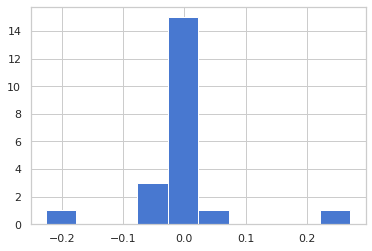

In [66]:
plt.hist(np.nanmean(ta.fr,axis=1)- np.nanmean(ta1.fr,axis=1))

In [22]:
tmf = reload(tmf)
be = tmf.BehaviorData(session_info, overwrite=True)

In [17]:
be = session_info.get_event_behavior()
be.trial_table.head()

,t0,tD,tE,tE_1,tE_2,dur,cue,dec,correct,long,goal,grw,sw,vsw
0,1634,2321,2955,2606,2955,1321,L,L,1.0,1.0,4.0,1,0,0
1,3119,3201,3416,3416,3587,296,R,L,0.0,NaN,NaN,0,1,1
2,3929,4272,4627,4546,4627,698,R,R,1.0,1.0,2.0,1,0,0
3,4865,5172,5401,5401,5527,536,R,L,0.0,NaN,NaN,0,0,0
4,5969,6191,7198,7198,7198,1229,R,L,0.0,NaN,NaN,0,0,0


In [55]:
ss = np.where(be._make_event_vector('R_blank'))[0]

In [3]:
#be.trial_table[(be.trial_table.tE!=be.trial_table.tE_1)]
#be.trial_table[(be.trial_table.long==1) & (be.trial_table.goal==4) ]
be.trial_table[ (be.trial_table.grw==0) ]

#be.trial_table[ (be.trial_table.dec=='R')].long.value_counts()

NameError: name 'be' is not defined

In [131]:
#(be.trial_table.correct==1).mean(), (be.trial_table.correct.mean())
#pd.crosstab(be.trial_table.goal,be.trial_table.long)

long,0.0,1.0
goal,,
1.0,3,28
2.0,21,3
3.0,15,20
4.0,13,15


In [73]:
ii=2
((ii)%2)+1

1

In [138]:
be.event_table[be.event_table.trial_num==58]

,event,t0,tE,dur,trial_num,out_bound
1068,CL,51116,51545,429,58,1
1069,R_blank,51124,51128,4,58,1
1070,DE1,51126,51131,5,58,1
1071,RW1,51126,51150,24,58,1
1072,RD,51126,51150,24,58,1
1073,L2,51262,51274,12,58,1
1074,R_blank,51272,51276,4,58,1
1075,RD,51274,51298,24,58,1
1076,DE2,51274,51279,5,58,1
1077,RW2,51274,51298,24,58,1


In [5]:
%%time
if 0:
    zr = session_info.get_zone_rates_remap(overwrite=True)
    zr.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [7]:
%%time
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

CPU times: user 19.3 s, sys: 383 ms, total: 19.7 s
Wall time: 3.52 s


In [14]:
cond_pair = 'CR_bo-CL_bo'
conds = cond_pair.split("-")
trial_sets = {}
for cond in conds:
    cond_set = ta.bal_cond_sets[cond]['cond_set']
    trial_sets[cond] = ta.get_trials_boot_cond_set(cond_set )

In [118]:
trial_sets['CR_bo'][:,0]

(64, 100)

In [119]:
n_segs = 39
dat = np.zeros( (ta.n_trials, ta.n_units*n_segs))

for unit in range(ta.n_units):
    ix =  np.arange(n_segs) + unit*n_segs
    dat[:,ix] = ta.trial_zones_rates['out'][unit].values
    
dat2 = pd.DataFrame(dat.copy())


In [123]:
m1 = dat2.loc[trial_sets[conds[0]][:,0]].mean()
m2 = dat2.loc[trial_sets[conds[1]][:,0]].mean()


In [177]:
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

In [152]:
%%time
bcorrs = {}
for cond_pair in ta.bal_cond_pairs:
    bcorrs[cond_pair] = ta.pop_zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair)

CPU times: user 2.14 s, sys: 0 ns, total: 2.14 s
Wall time: 2.13 s


In [175]:
def _transform_corr(_c):
    return rs.fisher_r2z(rs.kendall2pearson(_c))

df = pd.DataFrame(index=[0])
for group, corrs in bcorrs.items():
    try:
        c = corrs.copy()
        c.replace([np.inf, -np.inf], np.nan, inplace=True)
        df[f"{group}-corr_m"] = c.mean(axis=1)

        z = _transform_corr(corrs)
        z.replace([np.inf, -np.inf], np.nan, inplace=True)
        df[f"{group}-corr_z"] = z.mean(axis=1)
    except:
        df[f"{group}-corr_m"] = np.nan
        df[f"{group}-corr_z"] = np.nan

In [176]:
# c = corrs.copy()
# c.replace([np.inf, -np.inf], np.nan, inplace=True)
# c.mean(axis=1)
df

,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,Co_bo-Inco_bo-corr_z,Co_bi-Inco_bi-corr_m,Co_bi-Inco_bi-corr_z,Even_bo-Odd_bo-corr_m,Even_bo-Odd_bo-corr_z,Even_bi-Odd_bi-corr_m,Even_bi-Odd_bi-corr_z
0,0.727143,1.525523,0.707113,1.453083,0.679357,1.358711,0.782136,1.756435,0.76474,1.677896


In [181]:
%%time 
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)
bb = ta.pop_zone_remapping_analyses()

CPU times: user 23.6 s, sys: 369 ms, total: 24 s
Wall time: 5.56 s


In [182]:
bb.T

,0
CR_bo-CL_bo-corr_m,7.271427e-01
CR_bo-CL_bo-corr_z,1.525523e+00
Co_bo-Inco_bo-corr_m,7.071134e-01
Co_bo-Inco_bo-corr_z,1.453083e+00
Co_bi-Inco_bi-corr_m,6.793568e-01
Co_bi-Inco_bi-corr_z,1.358711e+00
Even_bo-Odd_bo-corr_m,7.821361e-01
Even_bo-Odd_bo-corr_z,1.756435e+00
Even_bi-Odd_bi-corr_m,7.647401e-01
Even_bi-Odd_bi-corr_z,1.677896e+00


In [206]:
params = dict(zr_method='trial',
              reward_blank=False,
              not_inzone_blank=True,
              valid_transitions_blank=True,
              trial_end='tE')

# o = bytes()
# for k,v in params.items():
#     if type(v)=='str':
#         o+=v.encode('utf-8')
#     elif type(v)==bool:
#         o+= str(int(v)).encode('utf-8')
#     else:
#         o += str(v).encode('utf-8')
    
# print(o.hex())

o = ''
for k,v in params.items():
    if type(v)=='str':
        o+=v
    elif type(v)==bool:
        o+= str(int(v))
    else:
        o += str(v)
print(o)

trial011tE


In [205]:
o

b'trial011tE'

In [141]:
ta.get_pop_zone_rates()

,0,1,2,3,4,5,6,7,8,9,...,770,771,772,773,774,775,776,777,778,779
0,41.806152,74.309017,93.927051,87.941453,34.318644,34.522542,28.750000,33.174181,32.579399,NaN,...,0.477458,7.006441,NaN,NaN,NaN,NaN,0.000000,1.190983,7.340847,2.380952
1,48.699341,22.112793,31.672746,28.272542,19.852458,23.841186,34.761271,34.881966,37.442162,50.629976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.291949,30.629976,44.136271,47.500000,44.681695,16.193644,38.618034,22.083333,34.398293,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,35.973984,47.809017,38.125000,13.690983,14.681695,1.190983,0.000000,0.000000,30.213509,NaN,...,0.000000,5.161803,13.909153,11.005009,5.555556,3.333333,13.298596,6.879976,5.305987,4.828962
4,40.256900,44.881966,59.613729,82.317627,45.758192,50.236068,27.381966,25.572949,31.398106,61.381966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,34.321001,24.201404,24.681695,19.136271,10.357143,3.881966,15.000000,21.292155,28.329860,NaN,...,0.000000,5.892857,3.500000,0.000000,7.340847,2.857488,NaN,NaN,NaN,NaN
141,34.348751,29.414590,24.255636,0.000000,3.690983,16.785714,29.118034,11.409153,25.710888,45.974386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,29.815898,13.051229,33.750000,23.077869,9.484972,16.507514,16.785714,24.616121,32.211668,44.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,33.620479,47.242486,39.381966,25.992486,22.010019,17.939887,27.340847,28.454915,30.124028,NaN,...,6.500000,4.904508,7.279274,0.000000,0.000000,2.380952,NaN,NaN,NaN,NaN


In [86]:
tmf = reload(tmf)
be2 = tmf.BehaviorData(session_info, overwrite=True)

In [103]:
be2.trial_table.loc[10:16]

,t0,tE,tE_2,dur,cue,dec,correct,long,goal,sw,vsw
10,10990,11466,11466,475,R,R,1,1,2,0,0
11,11692,12090,12090,398,L,L,1,0,4,1,1
12,12385,12988,12988,603,L,R,0,-1,-1,0,0
13,13390,13819,13819,429,L,L,1,0,4,0,0
14,14071,14433,14433,362,L,R,0,-1,-1,0,0
15,14971,15555,15913,584,R,L,0,-1,-1,1,0
16,16536,16930,16930,394,L,R,0,-1,-1,1,0


In [107]:
be2.trial_table[ (be2.trial_table.tE!=be2.trial_table.tE_2) & (be2.trial_table.correct==0) ]

,t0,tE,tE_2,dur,cue,dec,correct,long,goal,sw,vsw
15,14971,15555,15913,584,R,L,0,-1,-1,1,0
62,53886,54291,54460,405,R,L,0,-1,-1,1,0
103,84550,89661,90532,5111,R,L,0,-1,-1,0,0
138,121317,123381,123858,2064,R,L,0,-1,-1,0,0


In [110]:
be2.event_table[be2.event_table.trial_num==130]

,event,t0,tE,dur,trial_num,out_bound
2386,CR,111969,112386,417,130,1
2387,L2,111976,112189,213,130,1
2388,DE1,111977,111982,5,130,1
2389,R_blank,112187,112191,4,130,1
2390,RD,112189,112213,24,130,1
2391,RW2,112189,112213,24,130,1
2392,DE2,112189,112194,5,130,1
2393,DR,112213,112386,173,130,1
2394,R_blank,112384,112388,4,130,1
2395,RD,112386,112410,24,130,1


,t0,tE,tR
0,1623,2168,2516
1,2522,3212,3635
2,3642,4247,4810
3,4816,5501,5867
4,5874,6377,6562
...,...,...,...
140,124845,125223,125415
141,125773,126336,126606
142,126612,127138,127427
143,127433,127797,128195


In [44]:
ta.event_table.event.unique()

array(['Start', 'DE4', 'L1', 'DE3', 'DE2', 'R_blank', 'RW1', 'RD', 'DE1',
       'CL', 'L2', 'RW2', 'DL', 'DE6', 'RW6', 'DE5', 'DR', 'RW5', 'CR',
       'RW4', 'RW3', 'Stop', '-1'], dtype=object)

In [49]:
ta.trial_table

,t0,tE,dur,cue,dec,correct,long,goal,sw,vsw
0,1623,2168,544,L,L,1,0,4,0,0
1,2522,3212,689,L,R,0,-1,-1,0,0
2,3642,4247,605,L,L,1,0,3,0,0
3,4816,5501,684,L,L,1,1,3,0,0
4,5874,6377,502,L,R,0,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...
140,124845,125223,378,R,L,0,-1,-1,0,0
141,125773,126336,562,R,R,1,0,1,0,0
142,126612,127138,525,R,R,1,1,1,0,0
143,127433,127797,363,R,L,0,-1,-1,0,0


In [70]:
x = 1.0
y = x
z = x

y = 2


print(x,y,z)

1.0 2 1.0


In [62]:
id(x), id(y)


(140477281986864, 140477281986960)

In [13]:
%%time
zr2 = ta.all_zone_remapping_analyses()

CPU times: user 16.6 s, sys: 860 ms, total: 17.4 s
Wall time: 28.2 s


In [14]:
zr2.head()

,CR-CL_corr,CR-CL_t_m,CR-CL_t_var,Even-Odd_corr,Even-Odd_t_m,Even-Odd_t_var,Co-Inco_corr,Co-Inco_t_m,Co-Inco_t_var,Out-In_corr,...,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo-Even_bo-Odd_bo-corr_ztp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_ztp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_ztp
0,0.632928,0.006999,1.423736,0.865047,0.134683,0.569919,0.589744,-1.069067,1.657556,0.017544,...,-27.025724,1.719630e-47,-2.647429,9.768733e-190,-31.001812,8.972151e-53,-1.516787,5.211167e-75,-18.095853,3.664940e-33
1,0.732794,-0.505324,1.879062,0.865047,-0.277313,0.942471,0.751687,0.527319,1.816224,0.090418,...,-22.499052,1.048724e-40,-2.078285,7.030589e-139,-17.597324,3.041658e-32,-3.749901,0.000000e+00,-40.270130,3.407029e-63
2,0.716599,0.274937,1.444137,0.829960,0.219069,0.928130,0.654521,-0.286867,2.142868,0.408907,...,-21.268508,1.067516e-38,-2.630066,8.028852e-199,-22.811059,3.336789e-41,-4.088638,0.000000e+00,-45.602606,2.864831e-68
3,0.508772,0.396116,0.809379,0.551957,0.029065,0.988595,0.508772,0.117360,0.769505,0.282051,...,-4.217352,5.475602e-05,-0.582222,2.748850e-27,-6.429842,4.536087e-09,-0.393252,3.321944e-21,-4.461276,2.156707e-05
4,0.139568,-0.113631,0.790008,0.341430,-0.005635,1.233016,0.060976,-0.159441,1.918500,-0.031039,...,-12.941464,5.185527e-23,-1.715664,1.754645e-91,-20.271485,5.139320e-37,-2.822153,5.920137e-214,-30.932211,1.097938e-52


In [5]:
%%time
a= session_info.get_bal_conds_seg_rates()

CPU times: user 13.6 ms, sys: 49 µs, total: 13.7 ms
Wall time: 12 ms


In [6]:
a

,CR_bo-left-m,CR_bo-left-n,CL_bo-left-m,CL_bo-left-n,Co_bo-left-m,Co_bo-left-n,Inco_bo-left-m,Inco_bo-left-n,Co_bi-left-m,Co_bi-left-n,...,CR_bo-CL_bo-right-t,CR_bo-CL_bo-right-p,Co_bo-Inco_bo-right-t,Co_bo-Inco_bo-right-p,Co_bi-Inco_bi-right-t,Co_bi-Inco_bi-right-p,Even_bo-Odd_bo-right-t,Even_bo-Odd_bo-right-p,Even_bi-Odd_bi-right-t,Even_bi-Odd_bi-right-p
0,23.261217,33.27,25.524606,40.0,25.462894,61.39,23.215827,13.0,39.198152,61.2,...,0.167764,4.598882e-01,-2.482966,0.000000e+00,-3.917902,0.000000e+00,0.463048,5.557474e-01,0.042817,9.923177e-01
1,38.788611,33.27,49.290277,40.0,48.834470,61.39,39.120387,13.0,42.885963,61.2,...,0.104804,7.019408e-01,-0.272581,3.814688e-04,-3.659685,0.000000e+00,0.331528,5.289826e-01,1.321604,0.000000e+00
2,55.274220,33.27,59.399086,40.0,59.433282,61.39,54.992367,13.0,55.070507,61.2,...,1.097982,7.305376e-09,-1.286788,0.000000e+00,-2.344908,0.000000e+00,0.098745,8.487759e-02,0.155085,3.941203e-01
3,3.272287,33.27,2.985160,40.0,3.010123,61.39,3.251433,13.0,1.893800,61.2,...,1.626334,0.000000e+00,0.628233,2.448263e-01,-0.155810,6.071790e-04,0.539641,3.142673e-03,-0.587393,6.294325e-02
4,0.744661,33.27,0.905502,40.0,0.908457,61.39,0.741892,13.0,1.568815,61.2,...,1.788291,0.000000e+00,-2.886637,0.000000e+00,-5.371081,0.000000e+00,-0.524089,7.494019e-04,1.382079,0.000000e+00
5,0.505666,33.27,0.518611,40.0,0.514581,61.39,0.513645,13.0,0.911143,61.2,...,1.208456,3.659051e-11,-2.258772,0.000000e+00,-3.205277,0.000000e+00,0.847525,2.947721e-06,0.090299,6.331783e-01
6,2.251230,33.27,2.776323,40.0,2.728683,61.39,2.277972,13.0,1.754666,61.2,...,-2.374438,0.000000e+00,-1.257410,0.000000e+00,-0.562530,2.844380e-01,-1.693896,0.000000e+00,0.016631,1.776423e-01
7,1.716064,33.27,1.531050,40.0,1.546062,61.39,1.703795,13.0,1.056895,61.2,...,-2.361741,0.000000e+00,-1.596745,0.000000e+00,-2.085444,0.000000e+00,0.448299,3.889721e-02,-0.462824,1.831740e-01
8,0.429444,33.27,1.127287,40.0,1.075712,61.39,0.456894,13.0,1.240920,61.2,...,3.396526,0.000000e+00,1.485007,0.000000e+00,-2.001462,0.000000e+00,0.735626,3.449519e-04,0.163826,9.673503e-01
9,8.457339,33.27,9.720851,40.0,10.037769,61.39,8.175636,13.0,6.789910,61.2,...,-0.303121,6.015658e-01,-0.831099,5.779821e-13,-1.796906,0.000000e+00,1.267215,0.000000e+00,-0.143091,6.425567e-01


In [5]:
session_info.run_analyses(which='bal_conds_seg_rates', verbose=True)

Analysis bal_conds_seg_rates completed.


In [6]:
session_info.run_analyses(which='zone_rates_remap', overwrite=True, verbose=True)

Analysis zone_rates_remap completed.


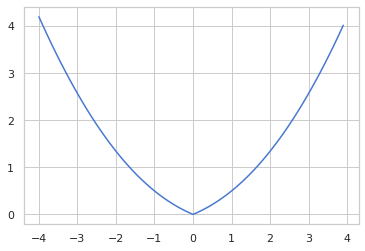

In [24]:
zval =  np.arange(-4,4,0.1)

plt.plot(zval, -np.log10(2*stats.norm.sf(np.abs(zval))))

In [31]:
2*stats.norm.sf(np.abs(-3))

0.0026997960632601866

In [27]:
stats.norm.isf(0.00001)

4.264890793922825

In [4]:
%%time
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)
tree_maze = tmf.TreeMazeZones()

CPU times: user 30.6 s, sys: 715 ms, total: 31.3 s
Wall time: 4.62 s


## code to get bootstaps of segments in a single pandas df

In [ ]:
%%time
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)


In [795]:
%%time
bal_cond = 'CR_bo'
segment_type = 'bigseg'
n_boot = 10
ta.get_seg_rate_boot(bal_cond, segment_type=segment_type, n_boot=n_boot)

(150, 3)
CPU times: user 66.2 ms, sys: 3.97 ms, total: 70.1 ms
Wall time: 68.1 ms


,cond,unit,boot,trial,seg,activity
0,CR,0.0,0.0,7.0,left,NaN
1,CR,0.0,0.0,14.0,left,NaN
2,CR,0.0,0.0,14.0,left,NaN
3,CR,0.0,0.0,34.0,left,NaN
4,CR,0.0,0.0,67.0,left,NaN
...,...,...,...,...,...,...
35995,CR,NaN,NaN,NaN,NaN,NaN
35996,CR,NaN,NaN,NaN,NaN,NaN
35997,CR,NaN,NaN,NaN,NaN,NaN
35998,CR,NaN,NaN,NaN,NaN,NaN


In [811]:
%%time

if 0:
    n_boot = 100
    occ_thr = 1
    bal_cond_set = ta.bal_cond_sets[bal_cond]

    seg_names = ta.tmz.get_segment_type_names(segment_type)
    trial_seg = bal_cond_set['trial_seg']
    cond = bal_cond_set['cond']
    sub_conds = bal_cond_set['sub_conds']
    cond_set = {cond: sub_conds}

    trial_sets = ta.get_trials_boot_cond_set(cond_set, n_boot=n_boot)[cond]
    all_zr = ta.get_trial_segment_rates(segment_type=segment_type, trial_seg=trial_seg,
                                          occupation_trial_samp_thr=occ_thr)

    n_trials = len(trial_sets)
    n_segs = len(seg_names)
    n_units = ta.n_units
    n_rows = n_units*n_boot*n_trials*n_segs

    df = pd.DataFrame(np.nan, index=range(n_rows), columns=['cond', 'unit', 'boot', 'trial', 'seg', 'activity'])
    df['cond'] = cond

    units = np.arange(n_units)
    boot_block_len = n_units*n_trials*n_segs
    unit_block_len = n_trials * n_segs

    for boot in range(n_boot):
        boot_idx_start = boot_block_len*boot
        boot_idx = np.arange(boot_block_len)+boot_idx_start

        df.loc[boot_idx, 'boot'] = boot

        trials = trial_sets[:, boot]
        for unit in units:
            unit_block_idx = np.arange(unit_block_len) + unit*unit_block_len + boot_idx_start
            df.loc[unit_block_idx, 'unit'] = unit

            temp = all_zr[unit].loc[trials].copy()
            temp['trial'] = temp.index
            temp = temp.melt(id_vars='trial', value_name='activity', var_name='seg')
            temp = temp.set_index(unit_block_idx)

            df.loc[unit_block_idx, ['trial', 'seg', 'activity']] = temp


CPU times: user 24.9 s, sys: 0 ns, total: 24.9 s
Wall time: 24.9 s


In [812]:
df.groupby(['seg','unit']).mean()

boot    trial   activity
seg  unit                          
left 0.0   49.5  62.8772   0.000000
     1.0   49.5  62.8772   9.611481
     2.0   49.5  62.8772   5.680534
     3.0   49.5  62.8772  30.475182
     4.0   49.5  62.8772   0.083591
...         ...      ...        ...
stem 19.0  49.5  62.8772   2.329000
     20.0  49.5  62.8772   1.841287
     21.0  49.5  62.8772   2.274747
     22.0  49.5  62.8772   3.667482
     23.0  49.5  62.8772   3.438688

[72 rows x 3 columns]

## dev of zone rate comparisons between trials

In [25]:
%%time
ta = tmf.TrialAnalyses(session_info)
tree_maze = tmf.TreeMazeZones()

CPU times: user 28.3 s, sys: 556 ms, total: 28.8 s
Wall time: 4.19 s


In [5]:
%%time
df = ta.get_avg_seg_rates_boot()

CPU times: user 48.8 s, sys: 11.9 ms, total: 48.8 s
Wall time: 48.9 s


In [6]:
df

,boot,cond,unit,seg,m
0,0,CR_bo,0,left,7.391808
1,0,CR_bo,1,left,0.682093
2,0,CR_bo,2,left,0.349615
3,0,CR_bo,3,left,13.236645
4,0,CR_bo,4,left,15.215060
...,...,...,...,...,...
65995,99,Odd_bi,17,right,3.757452
65996,99,Odd_bi,18,right,3.091950
65997,99,Odd_bi,19,right,3.640939
65998,99,Odd_bi,20,right,5.382229


# balanced sampling of trials for comparing the effects of the cue by zone

In [816]:
n_boot = 100
group_set = 'CR-CL'
cond_set = ta.group_cond_sets[group_set]
trial_sets = ta.get_trials_boot_cond_set(cond_set, n_sel_trials=None, n_boot=n_boot)

AttributeError: 'TrialAnalyses' object has no attribute 'group_cond_sets'

In [12]:
ta.bal_cond_sets

{'CR_bo': {'cond': 'CR',
  'sub_conds': ['Co', 'Inco'],
  'trial_seg': 'out',
  'cond_set': {'CR': ['Co', 'Inco']}},
 'CL_bo': {'cond': 'CL',
  'sub_conds': ['Co', 'Inco'],
  'trial_seg': 'out',
  'cond_set': {'CL': ['Co', 'Inco']}},
 'Co_bo': {'cond': 'Co',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Co': ['CL', 'CR']}},
 'Inco_bo': {'cond': 'Inco',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Inco': ['CL', 'CR']}},
 'Co_bi': {'cond': 'Co',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'in',
  'cond_set': {'Co': ['CL', 'CR']}},
 'Inco_bi': {'cond': 'Inco',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'in',
  'cond_set': {'Inco': ['CL', 'CR']}},
 'Even_bo': {'cond': 'Even',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Even': ['CL', 'CR']}},
 'Odd_bo': {'cond': 'Odd',
  'sub_conds': ['CL', 'CR'],
  'trial_seg': 'out',
  'cond_set': {'Odd': ['CL', 'CR']}},
 'Even_bi': {'cond': 'Even',
  'sub_conds': ['CL', 'CR'],
  'trial_se

In [415]:
ta.trial_table.loc[trial_sets['CR'][:,0]].correct.value_counts()

1    47
0    47
Name: correct, dtype: int64

In [416]:
trial_sets['CR'].shape, trial_sets['CL'].shape

((94, 100), (88, 100))

In [22]:
ta.bal_cond_pairs

['CR_bo-CL_bo',
 'Co_bo-Inco_bo',
 'Co_bi-Inco_bi',
 'Even_bo-Odd_bo',
 'Even_bi-Odd_bi']

## pandas implementation (slow...)

In [9]:
%%time
n_boot=100
segment_type = 'bigseg'
conds = list(ta.bal_cond_sets.keys())

n_segs = len(ta.tmz.bigseg_names)
n_units = ta.n_units
n_conds = len(conds)

n_rows = n_boot*n_units*n_segs*n_conds
df = pd.DataFrame(index=range(n_rows), columns= ['boot', 'cond', 'unit', 'seg', 'm'])
cnt = 0
block_idx_len = n_units*n_segs
for cond in conds:
    bal_cond_set = ta.bal_cond_sets[cond]
    cond_set = bal_cond_set['cond_set']
    trial_seg = bal_cond_set['trial_seg']
    
    trial_set = ta.get_trials_boot_cond_set(cond_set)
    
    for boot in range(n_boot):
        idx = np.arange(block_idx_len) + cnt*block_idx_len
        
        trials = trial_set[:,boot]
        temp = ta.get_avg_trial_zone_rates(trials=trials, segment_type=segment_type, trial_seg=trial_seg)
        temp['unit'] = temp.index
        temp['cond'] = cond
        temp['boot'] = boot
        
        temp = temp.melt(id_vars=['boot','cond','unit'], value_name='seg', var_name='m')
        df.loc[idx] = temp.set_index(idx)
        
        cnt +=1
df = df.astype({'m':float})

CPU times: user 47.3 s, sys: 15.5 ms, total: 47.3 s
Wall time: 47.3 s


In [14]:
dfm = df.groupby(['unit', 'cond', 'seg']).mean().reset_index()

In [15]:
dfm

,unit,cond,seg,m
0,0,CL_bo,left,16.335738
1,0,CL_bo,right,10.230009
2,0,CL_bo,stem,9.379966
3,0,CR_bo,left,6.461388
4,0,CR_bo,right,6.590301
...,...,...,...,...
655,21,Odd_bi,right,5.858606
656,21,Odd_bi,stem,4.661925
657,21,Odd_bo,left,7.904324
658,21,Odd_bo,right,5.844483


[None, None, None, None, None, None]

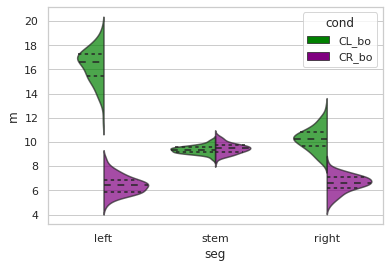

In [18]:
cond_pair = ta.bal_cond_pairs[0].split('-')
ax=sns.violinplot(data=df[ (df.unit==0) & (df.cond.isin(cond_pair))], x='seg', hue='cond', y='m', split=True, inner='quartile', hue_order=[cond_pair[1], cond_pair[0]], palette=['green','purple'], alpha=0.7, saturation=1)
plt.setp(ax.collections, alpha=.7)
#sns.boxplot(data=df[df.unit==0], x='seg', hue='cond', y='m', hue_order=['CL', 'CR'], palette=['green','purple'])

In [153]:
rs = reload(rs)

In [19]:
%%time
unit = 0
cond1 = 'CR_bo'
cond2 = 'CL_bo'
seg = 'left'
x = df.loc[(df.unit==unit) & (df.cond==cond1) & (df.seg==seg)].m.values
y = df.loc[(df.unit==unit) & (df.cond==cond2) & (df.seg==seg)].m.values
z = rs.bootstrap_diff(x,y)

CPU times: user 102 ms, sys: 20 µs, total: 102 ms
Wall time: 100 ms


In [20]:
stats.ttest_ind(x,y)

Ttest_indResult(statistic=-61.26203680288724, pvalue=1.1469971792507803e-130)

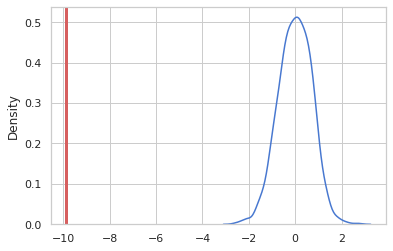

In [21]:
ax=sns.kdeplot(z[2])
ax.axvline(z[0], color='r', lw=3)

In [312]:
%%time
z = rs.bootstrap_tdiff(x,y)

CPU times: user 153 ms, sys: 12.5 ms, total: 166 ms
Wall time: 130 ms


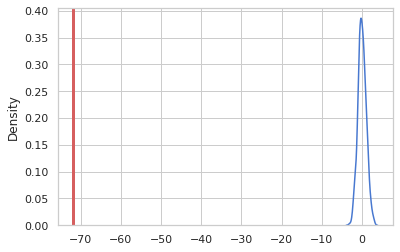

In [313]:
ax=sns.kdeplot(z[2])
ax.axvline(z[0], color='r', lw=3)

## straight comparison of cue conditions

In [324]:
%%time
segment_type = 'bigseg'
conds = ['CR', 'CL']

trial_sets2 = {}
n_trials = {}
for cond in conds:
    trial_sets2[cond] = ta.get_condition_trials(cond)
    n_trials[cond] = len(trial_sets2[cond])
    
n_segs = len(ta.tmz.bigseg_names)
n_units = ta.n_units
n_conds = len(conds)
n_total_trials = sum(n_trials.values())

n_rows = 0 
for cond in conds:
    n_rows = n_units*n_segs*n_conds*n_trials[cond]

df2 = pd.DataFrame(index=range(n_rows), columns= ['unit', 'trial', 'seg', 'activity', 'cond'])

cnt = 0
for cond in conds:
    block_idx_len = n_units*n_segs*n_trials[cond]
    idx = np.arange(block_idx_len) + cnt*block_idx_len

    trials = trial_sets2[cond]
    
    a = ta.get_trial_segment_rates(trials=trials, segment_type=segment_type)
    d = pd.DataFrame()
    for unit in range(ta.n_units):
        temp = a[unit]
        temp['unit'] = unit
        temp['trial'] = trials
        temp = temp.melt(id_vars=['unit', 'trial'], value_name='activity', var_name='seg')
        d = pd.concat((d,temp), ignore_index=True)

    d['cond'] = cond
    df2.loc[idx] = d.set_index(idx)

    cnt +=1
df2 = df2.astype({'activity':float})

CPU times: user 188 ms, sys: 0 ns, total: 188 ms
Wall time: 187 ms


In [330]:
a = ta.get_trial_segment_rates(trials=trials, segment_type=segment_type)
a[0]

,left,stem,right
0,18.547630,9.417098,NaN
1,NaN,5.758649,7.936508
2,24.327791,7.225752,NaN
3,3.890915,5.993691,NaN
4,7.692308,12.345679,NaN
...,...,...,...
84,19.873874,9.097146,NaN
85,NaN,8.798920,9.168379
86,NaN,2.633136,13.768657
87,20.756579,9.512195,NaN


In [ ]:
trials = trial_sets2[cond]
    
    a = ta.get_trial_segment_rates(trials=trials, segment_type=segment_type)


<AxesSubplot:xlabel='seg', ylabel='activity'>

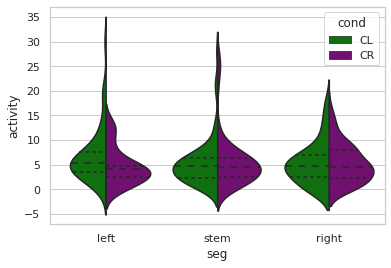

In [326]:
sns.violinplot(data=df2[df.unit==0], x='seg', hue='cond', y='activity', split=True, inner='quartile', hue_order=['CL', 'CR'], palette=['green','purple'], alpha=0.7)


In [334]:
unit = 0
cond1 = 'CR'
cond2 = 'CL'
seg = 'left'
x = df2.loc[(df.unit==unit) & (df.cond==cond1) & (df.seg==seg)].activity.values
y = df2.loc[(df.unit==unit) & (df.cond==cond2) & (df.seg==seg)].activity.values
z = rs.bootstrap_diff(x,y)

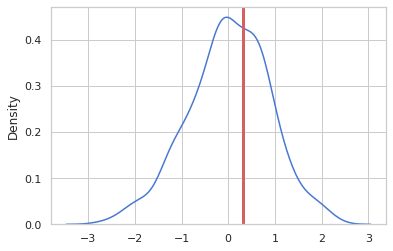

In [335]:
ax=sns.kdeplot(z[2])
ax.axvline(z[0], color='r', lw=3)

## nested bootstrap approach:
    (1) take a sampling of the trials (balanced for some sub-conditions - in this case correct/incorrect)
    (2) for each of those compute a bootstrap achieved SL, and accumulate those.
    (3) average the asl

In [445]:
rs = reload(rs)

In [422]:
%%time

conds = ['CR', 'CL']
n_boot=100
n_units = ta.n_units
n_segs = len(ta.tmz.bigseg_names)
n_conds = 2
measures = ['m', 't', 'p']


pd.DataFrame()
t = np.zeros((ta.n_units,n_boot,3))
p = np.zeros((ta.n_units,n_boot,3))
for boot in range(n_boot):
    trials1 = trial_sets['CR'][:,boot]
    trials2 = trial_sets['CL'][:,boot]
    trial_segment_rates_1 = ta.get_trial_segment_rates(trials1, segment_type='bigseg')
    trial_segment_rates_2 = ta.get_trial_segment_rates(trials2, segment_type='bigseg')
    
    for unit in range(ta.n_units):
        #zu[unit, boot], _, up[unit, boot], _, _ = rs.mannwhitney_z(trial_segment_rates_1[unit], trial_segment_rates_2[unit], return_all=True)
        t[unit,boot], p[unit,boot] = stats.ttest_ind(trial_segment_rates_1[unit], trial_segment_rates_2[unit], nan_policy='omit', equal_var=False)



CPU times: user 9.64 s, sys: 19 ms, total: 9.66 s
Wall time: 9.64 s


In [444]:
pvals = pd.DataFrame(index=range(ta.n_units), columns=ta.tmz.bigseg_names)
for unit in range(ta.n_units):
    pvals.loc[unit] = rs.combine_pvals(p[unit], axis=0)
    #pvals.loc[unit] = 1-stats.chi2.cdf(np.nansum(-2*np.log(p[unit]), axis=0),df=n_boot*2)
pvals<0.01

,left,stem,right
0,True,False,True
1,True,False,False
2,False,True,True
3,False,False,False
4,True,False,True
5,True,False,False
6,True,False,True
7,True,True,True
8,True,True,True
9,False,False,True


### re-implement and generalize the above

In [22]:
%%time

n_boot=100
segment_type = 'bigseg'


bal_cond_sets = ta.bal_cond_sets
conds = list(bal_cond_sets.keys())
cond_pairs = ta.bal_cond_pairs

seg_names = ta.tmz.get_segment_type_names(segment_type)

n_units = ta.n_units
n_segs = len(seg_names)
n_conds = len(conds)

m = {cond: np.zeros((n_units,n_boot,n_segs)) for cond in conds}
t = {cond_pair: np.zeros((n_units,n_boot,n_segs)) for cond_pair in cond_pairs}
p = {cond_pair: np.zeros((n_units,n_boot,n_segs)) for cond_pair in cond_pairs}

trial_sets = {}
for cond in conds:
    trial_sets[cond]= ta.get_trials_boot_cond_set(bal_cond_sets[cond]['cond_set'])
        

for boot in range(n_boot):
    trial_segment_rates = {}
    
    for cond in conds:
        bal_cond_set = bal_cond_sets[cond]
        trial_segment_rates[cond] = ta.get_trial_segment_rates(trial_sets[cond][:,boot], 
                                                               segment_type=segment_type, 
                                                               trial_seg=bal_cond_set['trial_seg'])
        for unit in range(n_units):
            m[cond][unit, boot] = trial_segment_rates[cond][unit].mean()
        
    for cond_pair in cond_pairs:
        cond1, cond2 = cond_pair.split('-')
        for unit in range(n_units):
            temp = stats.ttest_ind(trial_segment_rates[cond1] [unit], 
                                   trial_segment_rates[cond2][unit], 
                                   nan_policy='omit')
            t[cond_pair][unit,boot], p[cond_pair][unit,boot] = temp[0], temp[1]
        
    

CPU times: user 54.3 s, sys: 124 ms, total: 54.5 s
Wall time: 54.4 s


In [62]:
%%time

n_boot=100
segment_type = 'bigseg'


bal_cond_sets = ta.bal_cond_sets
conds = list(bal_cond_sets.keys())
cond_pairs = ta.bal_cond_pairs

seg_names = ta.tmz.get_segment_type_names(segment_type)

n_units = ta.n_units
n_segs = len(seg_names)
n_conds = len(conds)

trial_sets = {}
for cond in conds:
    trial_sets[cond]= ta.get_trials_boot_cond_set(bal_cond_sets[cond]['cond_set'])
    
def _worker(boot):
    _m = {cond: np.zeros((n_units, n_segs)) for cond in conds}
    _n = {cond: np.zeros((n_units, n_segs)) for cond in conds}
    _t = {cond_pair: np.zeros((n_units, n_segs)) for cond_pair in cond_pairs}
    _p = {cond_pair: np.zeros((n_units, n_segs)) for cond_pair in cond_pairs}
    
    trial_segment_rates = {}
    
    for cond in conds:
        bal_cond_set = bal_cond_sets[cond]
        trial_segment_rates[cond] = ta.get_trial_segment_rates(trial_sets[cond][:,boot], 
                                                               segment_type=segment_type, 
                                                               trial_seg=bal_cond_set['trial_seg'])
        for unit in range(n_units):
            _m[cond][unit] = trial_segment_rates[cond][unit].mean()
            _n[cond][unit] = trial_segment_rates[cond][unit].count()
    for cond_pair in cond_pairs:
        cond1, cond2 = cond_pair.split('-')
        for unit in range(n_units):
            temp = stats.ttest_ind(trial_segment_rates[cond1] [unit], 
                                   trial_segment_rates[cond2][unit], 
                                   nan_policy='omit')
            _t[cond_pair][unit], _p[cond_pair][unit] = temp[0], temp[1]
            
    return _m, _n, _t, _p

with Parallel(n_jobs=10) as parallel:
    out = parallel(delayed(_worker)(boot) for boot in range(n_boot))

CPU times: user 3.76 s, sys: 677 ms, total: 4.44 s
Wall time: 11.2 s


In [64]:
%%time

m = {cond: np.zeros((n_boot, n_units, n_segs)) for cond in conds}
n = {cond: np.zeros((n_boot, n_units, n_segs)) for cond in conds}
t = {cond_pair: np.zeros((n_boot, n_units, n_segs)) for cond_pair in cond_pairs}
p = {cond_pair: np.zeros((n_boot, n_units, n_segs)) for cond_pair in cond_pairs}

for boot in range(n_boot):
    _m,_n, _t, _p = out[boot]
    
    for cond in _m.keys():
        m[cond][boot] = _m[cond]
        n[cond][boot] = _n[cond]
        
    for cond_pair in _t.keys():
        t[cond_pair][boot] = _t[cond_pair]
        p[cond_pair][boot] = _p[cond_pair]
    

CPU times: user 7.6 ms, sys: 25 µs, total: 7.62 ms
Wall time: 6.55 ms


In [60]:
trial_segment_rates[cond][0].count()

left     40
stem     91
right    51
dtype: int64

In [55]:
%%time
tmf = reload(tmf)
ta = tmf.TrialAnalyses(session_info)

CPU times: user 28.2 s, sys: 513 ms, total: 28.7 s
Wall time: 4.34 s


In [57]:
%%time
out2 = ta.segment_rate_boot_analyses()


CPU times: user 3.5 s, sys: 243 ms, total: 3.74 s
Wall time: 8.32 s


In [46]:
df = df.Dataframe()
for boot in range(n_boot):
    m[conds[0]][]

(100, 22, 3)

In [84]:
#df = pd.DataFrame()

cols1 = []
cols2 = []
for seg in seg_names:
    for cond in conds:
        cols1.append(f"{cond}-{seg}-m")
        cols1.append(f"{cond}-{seg}-n")


    for cond_pair in cond_pairs:
        cols2.append(f"{cond_pair}-{seg}-t")
        cols2.append(f"{cond_pair}-{seg}-p")
        

cols = cols1+cols2
df = pd.DataFrame(index=range(n_units), columns=cols)

for cond in conds:
    cond_col = [f"{cond}-{seg}-m" for seg in seg_names] 
    df[cond_col] = m[cond].mean(axis=0) 
    
    cond_col = [f"{cond}-{seg}-n" for seg in seg_names] 
    df[cond_col] = n[cond].mean(axis=0) 

for cond_pair in cond_pairs:
    cond_col = [f"{cond_pair}-{seg}-t" for seg in seg_names] 
    df[cond_col] = t[cond_pair].mean(axis=0) 
    
    cond_col = [f"{cond_pair}-{seg}-p" for seg in seg_names] 
    df[cond_col] = rs.combine_pvals(p[cond_pair],axis=0)
    

In [85]:
df

,CR_bo-left-m,CR_bo-left-n,CL_bo-left-m,CL_bo-left-n,Co_bo-left-m,Co_bo-left-n,Inco_bo-left-m,Inco_bo-left-n,Co_bi-left-m,Co_bi-left-n,...,CR_bo-CL_bo-right-t,CR_bo-CL_bo-right-p,Co_bo-Inco_bo-right-t,Co_bo-Inco_bo-right-p,Co_bi-Inco_bi-right-t,Co_bi-Inco_bi-right-p,Even_bo-Odd_bo-right-t,Even_bo-Odd_bo-right-p,Even_bi-Odd_bi-right-t,Even_bi-Odd_bi-right-p
0,6.461388,45.23,16.335738,44.0,16.453069,57.0,6.587221,32.62,18.359806,57.83,...,-2.863906,0.000000e+00,-3.828961,0.000000e+00,0.179081,1.387558e-02,-0.173061,7.213767e-01,0.289779,4.032643e-01
1,0.442017,45.23,2.896821,44.0,2.932558,57.0,0.457828,32.62,4.116600,57.83,...,0.496072,9.999996e-01,0.591568,9.999196e-01,-0.085625,6.693148e-02,0.660021,9.709792e-01,2.064995,0.000000e+00
2,0.275962,45.23,0.277299,44.0,0.276206,57.0,0.269945,32.62,1.485502,57.83,...,-1.432601,0.000000e+00,-1.967648,0.000000e+00,0.998376,5.334399e-05,-0.594667,2.779646e-03,0.246421,1.182772e-03
3,11.499475,45.23,10.735456,44.0,10.656074,57.0,11.484765,32.62,9.426012,57.83,...,-0.148692,1.136179e-01,-0.647606,4.959605e-02,-2.074542,0.000000e+00,1.289690,1.820766e-14,-0.861331,3.654086e-05
4,14.788781,45.23,10.818640,44.0,10.680783,57.0,14.760951,32.62,6.138986,57.83,...,2.216960,0.000000e+00,2.422199,0.000000e+00,-2.759871,0.000000e+00,0.901365,8.376630e-07,0.452683,1.107104e-02
5,19.141093,45.23,17.456105,44.0,17.407549,57.0,19.150258,32.62,15.070234,57.83,...,-0.224747,8.147344e-02,-0.116278,3.899490e-02,1.650695,0.000000e+00,0.678430,5.441594e-04,3.195074,0.000000e+00
6,1.441995,45.23,1.178748,44.0,1.188031,57.0,1.427324,32.62,1.369253,57.83,...,-1.836582,0.000000e+00,-2.433930,0.000000e+00,-0.590578,2.904864e-04,0.790260,1.054780e-04,0.728902,7.195239e-04
7,1.711552,45.23,2.112227,44.0,2.090121,57.0,1.713266,32.62,4.629488,57.83,...,2.932802,0.000000e+00,2.985017,0.000000e+00,-5.409354,0.000000e+00,-0.463343,1.357361e-01,0.198095,2.850008e-01
8,4.271681,45.23,3.502989,44.0,3.451090,57.0,4.304730,32.62,4.780975,57.83,...,-1.179223,3.018152e-11,-1.994110,0.000000e+00,-3.628192,0.000000e+00,-1.197779,0.000000e+00,0.945925,3.568577e-08
9,3.250604,45.23,3.338812,44.0,3.340885,57.0,3.190133,32.62,3.064587,57.83,...,-2.171707,0.000000e+00,-2.557791,0.000000e+00,-4.895916,0.000000e+00,-1.127545,7.852607e-12,-0.209678,7.005598e-01


0      True
1     False
2      True
3     False
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18    False
19     True
20     True
21     True
Name: CR_bo-CL_bo-right-p, dtype: bool

In [432]:
-2*np.log(p[unit]).sum(axis=0)

array([3077.4158792 ,  222.94077547,           nan])

In [440]:
p[0].shape

(100, 3)

In [400]:
stats.chi2.ppf(0.99, 200)

249.4451229814416

In [383]:
(np.max(p[0], axis=0)**100)[0]

6.505083557055696e-238

<AxesSubplot:ylabel='Count'>

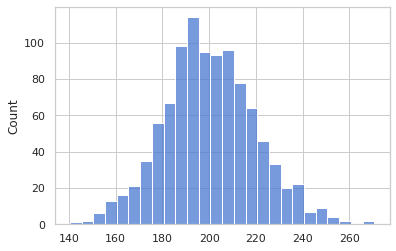

In [370]:
sns.histplot(stats.chi2.rvs(200,size=1000))

## another approach pooling time-samples across trials, and getting a single estimate by condition, as opposed to a trial wise estimate

In [337]:
%%time
n_boot=100
for boot in range(n_boot):
    trials1 = trial_sets['CR'][:,boot]
    trials2 = trial_sets['CL'][:,boot]
    
    ta.get_avg_zone_rates(trials=trials1, segment_type=segment_type)
    ta.get_avg_zone_rates(trials=trials2, segment_type=segment_type)

CPU times: user 3min 24s, sys: 3.97 s, total: 3min 28s
Wall time: 21 s


comparing with trial average, yields very different results.

In [342]:
a = ta.get_avg_trial_zone_rates(trials=trials2, segment_type='bigseg', reweight_by_trial_zone_counts=False)
b = ta.get_avg_zone_rates(trials=trials2, segment_type='bigseg')

In [343]:
a-b

,left,stem,right
0,-2.753812,-1.350638,0.445307
1,-0.792414,-0.300480,0.000000
2,-0.058789,-1.631670,-0.272139
3,-0.437210,-1.568107,-1.038791
4,0.506396,-0.933436,-1.430715
5,-0.299085,0.292948,-0.007217
6,-0.150725,-0.608818,0.055177
7,0.047208,-1.759054,-0.611491
8,0.121654,1.218815,0.441310
9,-0.116870,0.211887,0.856195


this approach takes x3 than the trial approach and these estimates can be obtained by setting the "reweight_by_trial_zone_counts" parameter in get_avg_trial_zone_rates to True (see above). otherwise, this approach doesn't take advantage of the the trial structure of the data.

In [344]:
a = ta.get_avg_trial_zone_rates(trials=trials2, segment_type='bigseg', reweight_by_trial_zone_counts=True)
b = ta.get_avg_zone_rates(trials=trials2, segment_type='bigseg')
a-b

,left,stem,right
0,0.000000e+00,-1.065814e-14,1.776357e-15
1,8.881784e-16,-2.220446e-16,0.000000e+00
2,-5.551115e-17,-8.881784e-16,8.881784e-16
3,-3.552714e-15,-8.881784e-15,-1.776357e-15
4,-3.552714e-15,-8.881784e-16,8.881784e-16
5,-7.105427e-15,-3.552714e-15,-1.776357e-15
6,-2.220446e-16,2.220446e-16,0.000000e+00
7,0.000000e+00,-3.552714e-15,-4.440892e-16
8,0.000000e+00,-7.105427e-15,-8.881784e-16
9,-8.881784e-16,-2.664535e-15,-1.776357e-15


In [425]:
zu.mean(axis=1)

array([[-2.62407367, -0.60194576, -1.41472408],
       [-4.36433533, -1.05603408,  0.12686602],
       [-0.93808144, -0.20283062, -0.94173507],
       [-0.25985708,  0.44492378,  0.55232014],
       [ 1.07961697,  0.15844383,  1.78475514],
       [ 0.66239812,  0.04013535,  0.13833107],
       [-0.72460044,  0.51104645, -0.98470919],
       [-2.03892036,  0.46195772,  2.50766487],
       [-0.10660414,  0.51075082,  0.59289046],
       [-0.94876885, -0.71828337, -0.06831526],
       [-0.91855952,  0.18085543,  0.82263058],
       [-0.64625725, -0.47555672, -0.25519593],
       [-2.11476884, -0.42915682,  0.7413912 ],
       [ 1.38153365, -0.21438836,  0.74438567],
       [ 2.7214422 ,  0.1692273 ,  0.28167286],
       [-1.38599799,  0.1508419 , -0.04544151],
       [-1.21946864, -2.16836463,  1.4341779 ],
       [-0.27895048,  0.16863604,  1.69679914],
       [-0.18361232, -0.32627744,  0.59483697],
       [ 0.88077508, -0.03554604, -0.67975529],
       [-0.0911561 , -0.36811618, -0.747

In [420]:
zu2

,left,stem,right
0,-2.430858,-0.295957,-1.410023
1,-4.022612,-1.119611,0.130931
2,-0.935728,0.073989,-0.835942
3,-0.223761,0.011168,0.741941
4,0.864531,-0.349006,2.041177
5,0.539060,-0.438351,0.402864
6,-0.650941,0.772001,-1.114590
7,-1.912139,0.667299,2.722688
8,-0.239017,0.416015,0.651296
9,-0.971326,-0.427183,0.020143


In [326]:
zu[0].mean(axis=0)

array([-1.31830049, -0.60194576, -0.26603922])

# Remaping
Establishing signficance between sets of correlation

In [4]:
ei = reload(ei)
subject = 'Li'
session = 'Li_T3g_062818'
session_info = ei.SubjectSessionInfo(subject, session)

In [5]:
tmf = reload(tmf)
rs = reload(rs)
ta = tmf.TrialAnalyses(session_info)
tree_maze = tmf.TreeMazeZones()

In [657]:
ta.bal_cond_sets

{'CR_bo': {'cond': 'CR', 'sub_conds': ['Co', 'Inco'], 'trial_seg': 'out'},
 'CL_bo': {'cond': 'CL', 'sub_conds': ['Co', 'Inco'], 'trial_seg': 'out'},
 'Co_bo': {'cond': 'Co', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'out'},
 'Inco_bo': {'cond': 'Inco', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'out'},
 'Co_bi': {'cond': 'Co', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'in'},
 'Inco_bi': {'cond': 'Inco', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'in'},
 'Even_bo': {'cond': 'Even', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'out'},
 'Odd_bo': {'cond': 'Odd', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'out'},
 'Even_bi': {'cond': 'Even', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'in'},
 'Odd_bi': {'cond': 'Odd', 'sub_conds': ['CL', 'CR'], 'trial_seg': 'in'}}

In [12]:
%%time 
test_cond_pair = list(ta.test_null_bal_cond_pairs.keys())
null_cond_pair = list(ta.test_null_bal_cond_pairs.values())

bcorrs_test = ta.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=test_cond_pair[0], parallel=True)
bcorrs_null = ta.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=null_cond_pair[0], parallel=True)

CPU times: user 5.25 s, sys: 410 ms, total: 5.66 s
Wall time: 13.3 s


In [21]:
a,b=rs.compare_corrs(bcorrs_test, bcorrs_null, 39, 39, corr_method='kendall')


In [25]:
b = pd.DataFrame(b).replace([np.inf, -np.inf], np.nan)
rs.combine_pvals(b, axis=1).shape

(24,)

In [26]:
session_info.get_bal_conds_seg_rates(overwrite=True)

,CR_bo-left-m,CR_bo-left-n,CL_bo-left-m,CL_bo-left-n,Co_bo-left-m,Co_bo-left-n,Inco_bo-left-m,Inco_bo-left-n,Co_bi-left-m,Co_bi-left-n,...,CR_bo-CL_bo-right-t,CR_bo-CL_bo-right-p,Co_bo-Inco_bo-right-t,Co_bo-Inco_bo-right-p,Co_bi-Inco_bi-right-t,Co_bi-Inco_bi-right-p,Even_bo-Odd_bo-right-t,Even_bo-Odd_bo-right-p,Even_bi-Odd_bi-right-t,Even_bi-Odd_bi-right-p
0,0.000000,22.86,0.061827,45.83,0.000000,52.0,0.055456,12.2,1.240785,52.0,...,-0.449130,9.925490e-02,0.184962,8.871820e-02,-3.952344,1.651230e-272,-0.295924,4.088359e-01,1.183583,8.817484e-11
1,9.607672,22.86,9.965547,45.83,9.142010,52.0,10.356918,12.2,5.872017,52.0,...,0.317680,8.108804e-02,0.437462,7.051145e-11,-4.315656,4.477746e-307,-2.118110,2.851841e-62,0.939751,2.593419e-06
2,5.675754,22.86,8.723727,45.83,9.410878,52.0,5.522035,12.2,12.625126,52.0,...,1.408759,2.914227e-25,0.132747,6.085963e-10,-2.264518,1.232887e-72,-0.019115,5.197054e-01,2.103125,7.038142e-57
3,30.476377,22.86,30.297676,45.83,32.252377,52.0,28.672602,12.2,25.555508,52.0,...,0.669045,8.393641e-03,1.299254,5.811579e-21,-3.561161,1.015103e-210,0.123865,3.041373e-01,0.564486,1.250263e-02
4,0.083283,22.86,1.258229,45.83,1.061334,52.0,0.410021,12.2,3.461626,52.0,...,0.865878,1.644537e-05,0.848397,7.818239e-03,-1.386467,1.009089e-38,-0.690653,1.513706e-02,0.427235,2.072044e-01
5,1.638777,22.86,1.620204,45.83,1.706138,52.0,1.572894,12.2,2.017836,52.0,...,-0.442682,1.233980e-01,0.256041,3.056937e-02,-0.538474,3.670904e-06,-0.545024,1.226885e-01,-0.375444,4.716245e-03
6,1.661959,22.86,1.383297,45.83,1.490884,52.0,1.569789,12.2,1.970260,52.0,...,1.931681,6.376312e-49,1.172819,2.905863e-17,-1.943109,1.343045e-45,-1.222709,2.125375e-11,0.103045,1.897594e-01
7,2.402417,22.86,2.123305,45.83,1.655002,52.0,2.811997,12.2,1.203984,52.0,...,-1.142806,4.931338e-14,-0.528767,2.418095e-08,-2.966917,2.551967e-137,1.291044,2.340002e-16,0.640612,1.776267e-02
8,2.281602,22.86,2.201727,45.83,2.222686,52.0,2.246985,12.2,2.214211,52.0,...,-2.770004,1.354491e-110,-1.771991,4.416303e-36,-2.288844,2.815983e-72,-0.333393,2.355031e-01,-0.470156,7.012562e-03
9,2.521999,22.86,1.877651,45.83,2.121872,52.0,2.172465,12.2,1.771450,52.0,...,-1.173586,1.351975e-11,-1.632347,2.137594e-47,-2.975288,5.150441e-134,-0.143003,7.168562e-01,0.865611,8.760559e-05


In [758]:
%%time
bcorrs2 = ta.all_zone_remapping_analyses()

CPU times: user 14.7 s, sys: 1.03 s, total: 15.7 s
Wall time: 32.8 s


In [752]:
bcorrs2.iloc[:,20:]

,CoSw-IncoSw_t_var,CR_bo-CL_bo-corr_m,CR_bo-CL_bo-corr_z,Co_bo-Inco_bo-corr_m,Co_bo-Inco_bo-corr_z,Co_bi-Inco_bi-corr_m,Co_bi-Inco_bi-corr_z,Even_bo-Odd_bo-corr_m,Even_bo-Odd_bo-corr_z,Even_bi-Odd_bi-corr_m,Even_bi-Odd_bi-corr_z,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo_Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo_Even_bo-Odd_bo-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi_Even_bi-Odd_bi-corr_zp
0,1.235757,0.763376,1.683651,0.766739,1.772983,0.570844,1.089080,0.849145,2.271506,0.804648,1.975515,-2.494057,-9.111342,9.483403e-15,-2.115054,-6.236692,1.105582e-08,-3.760826,-14.466462,3.684468e-26
1,1.137846,0.693674,1.411890,0.664254,1.321807,0.384888,0.649996,0.805194,1.887608,0.557277,1.021314,-2.018304,-19.919220,2.078107e-36,-2.400492,-24.319966,1.522220e-43,-1.575372,-20.415005,2.921152e-37
2,1.687041,0.587964,1.103316,0.619563,1.201918,0.701798,1.453675,0.697940,1.429494,0.778030,1.746867,-1.383853,-13.815994,7.862564e-25,-0.965523,-7.742136,8.526148e-12,-1.243907,-10.920966,1.083283e-18
3,1.342431,0.718888,1.507170,0.728857,1.550392,0.568905,1.052338,0.804154,1.882417,0.752794,1.640906,-1.592035,-15.078358,2.166784e-27,-1.408659,-11.713956,2.103723e-20,-2.497083,-26.711502,4.766679e-47
4,1.783245,0.352592,0.587410,0.475863,0.854354,0.611591,1.159062,0.713805,1.551483,0.774893,1.735621,-4.090218,-21.912037,9.313342e-40,-2.957667,-13.919532,4.814804e-25,-2.446131,-31.314242,3.641433e-53
5,1.145256,0.196513,0.317834,0.256067,0.422033,0.040549,0.064426,0.324599,0.542595,0.202294,0.327358,-0.953579,-9.701676,4.896599e-16,-0.511498,-4.463460,2.138490e-05,-1.115527,-13.730976,1.177182e-24
6,0.934496,0.214827,0.346620,0.178673,0.287515,0.073717,0.117503,0.213882,0.346048,0.135250,0.217138,0.002430,0.028855,9.770381e-01,-0.248332,-2.837995,5.508073e-03,-0.422713,-4.262087,4.626411e-05
7,1.380438,0.263008,0.428205,0.288150,0.473116,0.121098,0.194360,0.255918,0.417373,0.140031,0.224001,0.045955,0.603471,5.475753e-01,0.236498,2.718396,7.746360e-03,-0.125759,-1.491831,1.389232e-01
8,1.266220,0.041649,0.066066,0.015905,0.025425,0.214543,0.347179,0.240468,0.395546,0.181178,0.292747,-1.397866,-12.927243,5.554740e-23,-1.570292,-13.478094,3.928750e-24,0.230932,2.345240,2.101013e-02
9,1.338421,0.259187,0.422313,0.264775,0.433056,0.259074,0.423007,0.359134,0.604002,0.323963,0.540948,-0.770839,-8.168610,1.043491e-12,-0.725262,-7.839902,5.278018e-12,-0.500379,-5.115841,1.531924e-06


In [764]:
session_info.get_zone_rates_remap(overwrite=True)

,CR-CL_corr,CR-CL_t_m,CR-CL_t_var,Even-Odd_corr,Even-Odd_t_m,Even-Odd_t_var,Co-Inco_corr,Co-Inco_t_m,Co-Inco_t_var,Out-In_corr,...,Even_bi-Odd_bi-corr_z,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo_Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo_Even_bo-Odd_bo-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi_Even_bi-Odd_bi-corr_zp
0,0.808953,-0.211451,0.486280,0.877721,-0.113016,0.191453,0.776392,-0.570525,1.153839,0.000000,...,1.975515,-2.494057,-9.111342,9.483403e-15,-2.115054,-6.236692,1.105582e-08,-3.760826,-14.466462,3.684468e-26
1,0.718462,-0.043366,0.897410,0.824786,-0.066353,0.670243,0.689952,0.365321,2.043447,0.147099,...,1.021314,-2.018304,-19.919220,2.078107e-36,-2.400492,-24.319966,1.522220e-43,-1.575372,-20.415005,2.921152e-37
2,0.698578,-0.021576,1.695657,0.746799,-0.166608,0.859293,0.775249,-0.211495,1.317763,-0.082321,...,1.746867,-1.383853,-13.815994,7.862564e-25,-0.965523,-7.742136,8.526148e-12,-1.243907,-10.920966,1.083283e-18
3,0.724040,0.145275,1.214494,0.857752,0.323346,1.209420,0.761024,0.881225,1.132750,0.014845,...,1.640906,-1.592035,-15.078358,2.166784e-27,-1.408659,-11.713956,2.103723e-20,-2.497083,-26.711502,4.766679e-47
4,0.435583,0.000551,0.785249,0.676817,-0.150271,0.571364,0.494928,-0.626617,2.048655,0.371808,...,1.735621,-4.090218,-21.912037,9.313342e-40,-2.957667,-13.919532,4.814804e-25,-2.446131,-31.314242,3.641433e-53
5,0.282253,-0.012917,0.811574,0.470839,-0.288643,1.012311,0.271693,0.125616,1.020913,0.144399,...,0.327358,-0.953579,-9.701676,4.896599e-16,-0.511498,-4.463460,2.138490e-05,-1.115527,-13.730976,1.177182e-24
6,0.279004,0.367918,1.717087,0.317212,-0.077652,1.162749,0.248933,0.194321,1.066707,-0.020243,...,0.217138,0.002430,0.028855,9.770381e-01,-0.248332,-2.837995,5.508073e-03,-0.422713,-4.262087,4.626411e-05
7,0.362082,-0.118153,1.526835,0.344484,-0.243179,1.319322,0.355872,-0.342725,1.132821,0.363023,...,0.224001,0.045955,0.603471,5.475753e-01,0.236498,2.718396,7.746360e-03,-0.125759,-1.491831,1.389232e-01
8,0.055477,-0.149001,0.716229,0.345661,0.007160,0.829742,-0.027027,-0.180931,1.091222,0.022942,...,0.292747,-1.397866,-12.927243,5.554740e-23,-1.570292,-13.478094,3.928750e-24,0.230932,2.345240,2.101013e-02
9,0.357041,0.307970,1.591728,0.473684,0.135967,0.954109,0.371266,-0.219566,1.154429,-0.133603,...,0.540948,-0.770839,-8.168610,1.043491e-12,-0.725262,-7.839902,5.278018e-12,-0.500379,-5.115841,1.531924e-06


In [721]:
%%time 
n_boot=100
n_jobs=5
with Parallel(n_jobs=n_jobs) as parallel:
    bcorrs = {}
    for cond_pair in ta.bal_cond_pairs:
        bcorrs[cond_pair] = ta.zone_rate_maps_bal_conds_boot_corr(bal_cond_pair=cond_pair,
                                                                    n_boot=n_boot,
                                                                    parallel=parallel)

CPU times: user 25.6 s, sys: 923 ms, total: 26.5 s
Wall time: 32.9 s


In [722]:
bcorrs2.head()

,CR-CL_corr,CR-CL_t_m,CR-CL_t_var,Even-Odd_corr,Even-Odd_t_m,Even-Odd_t_var,Co-Inco_corr,Co-Inco_t_m,Co-Inco_t_var,Out-In_corr,...,Even_bi-Odd_bi-corr_z,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zm,CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt,CR_bo-CL_bo_Even_bo-Odd_bo-corr_zp,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zm,Co_bo-Inco_bo-Even_bo-Odd_bo-corr_zt,Co_bo-Inco_bo_Even_bo-Odd_bo-corr_zp,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zm,Co_bi-Inco_bi-Even_bi-Odd_bi-corr_zt,Co_bi-Inco_bi_Even_bi-Odd_bi-corr_zp
0,0.700405,-0.604803,2.520002,0.851552,-0.218679,0.593601,0.616734,0.098326,4.739149,0.028340,...,1.734978,-1.951846,94.136607,1.117904e-98,-2.927609,94.136607,1.117904e-98,-1.666369,94.136607,1.117904e-98
1,0.506569,-0.394890,1.381611,0.741364,-0.040216,0.374908,0.586976,0.656522,1.391392,0.101606,...,1.544384,-3.914616,66.353944,7.060964e-84,-3.339789,66.353944,7.060964e-84,-2.029148,66.353944,7.060964e-84
2,0.548542,0.157217,0.988346,0.463946,-0.310091,0.883999,0.515955,-0.472951,2.287341,-0.139001,...,1.187073,0.031261,81.063974,2.481624e-92,-0.240617,81.063974,2.481624e-92,-2.124867,81.063974,2.481624e-92
3,0.721997,0.060880,0.665418,0.743590,-0.125973,0.759007,0.757085,-0.178228,0.706638,-0.157895,...,0.768745,-0.086922,37.462121,2.821181e-60,-0.099430,37.462121,2.821181e-60,-1.202131,37.462121,2.821181e-60
4,0.688392,0.140113,2.587213,0.835695,0.038744,0.772282,0.689340,0.041251,2.883615,0.329507,...,1.437690,-2.260534,78.461001,5.979554e-91,-2.375280,78.461001,5.979554e-91,-0.866136,78.461001,5.979554e-91


In [691]:
zcorrs = {}
for cond, corr in bcorrs.items():
    zcorrs[cond] = _transform_corr(bcorrs[cond])

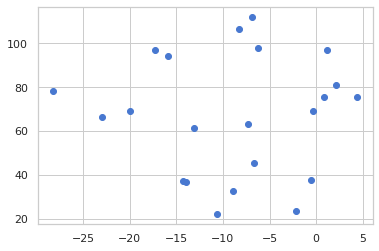

In [723]:
a,b=stats.ttest_rel(bcorrs['CR_bo-CL_bo'], bcorrs['Even_bo-Odd_bo'], axis=1, nan_policy='omit')
plt.scatter(a, bcorrs2['CR_bo-CL_bo-Even_bo-Odd_bo-corr_zt'])

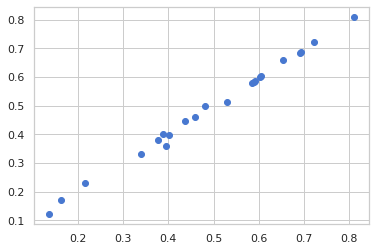

In [724]:
plt.scatter( bcorrs['CR_bo-CL_bo'].mean(axis=1), bcorrs2['CR_bo-CL_bo-corr_m'])

In [726]:
for test, null in ta.test_null_bal_cond_pairs.items():
    zc = rs.compare_corrs(bcorrs[test], bcorrs[null], 39, 39, corr_method='kendall')
    break
zc

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.914279,-1.046905,-0.286898,-3.828493,-3.248485,-2.141542,-1.085323,-2.946999,-1.883506,-3.148571,...,-2.942148,-2.143033,0.015161,-0.512132,-1.871628,-2.866342,-0.356700,-0.641828,-1.132374,-3.093075
1,-6.469427,-2.654307,-6.246539,-1.667978,-4.388283,-8.550812,-3.758027,-7.736146,-4.876700,-9.091428,...,-3.868288,-2.941612,-2.693276,-8.919498,-3.630741,-2.725783,-6.222024,-1.232953,-3.385731,-1.217995
2,-0.703322,-1.623454,0.684544,-0.880404,2.394965,0.019471,0.905475,-1.199705,-1.108333,1.163485,...,-0.624917,0.135659,0.876158,0.997003,1.765573,0.670688,-0.636635,-0.397751,0.368898,1.386193
3,-0.742744,-2.160987,0.711973,0.743833,-1.241041,1.539900,-0.376717,-0.085530,0.953002,-1.075327,...,2.241236,0.076185,0.384697,0.972986,0.573112,1.382348,-0.162350,0.231187,0.057942,-1.608947
4,-2.792863,-2.834482,-2.546547,-2.575730,-0.162908,-1.457142,-2.256766,-2.695392,-2.569116,-1.963769,...,-1.887890,-2.263391,-1.817071,-2.047549,-1.317716,-2.737732,-1.095792,-1.167952,-1.598465,-1.532100
5,-2.527003,-1.749427,0.000000,1.291764,1.846734,-0.774508,-1.153151,0.365931,0.170139,-0.065907,...,2.470663,-0.041959,0.523706,-0.472653,0.592534,0.802220,1.610831,1.528915,-0.034953,2.067667
6,-1.052071,1.571496,-0.495696,1.394483,-0.180216,0.121867,-0.045042,0.585015,-0.700509,-1.729663,...,0.051832,-0.189458,-0.465622,0.007732,0.351759,1.385743,0.117031,0.362369,0.424886,0.588071
7,0.058666,-0.744731,-0.799018,-0.640764,0.369686,0.616106,-0.321550,0.562206,-0.262269,-0.538175,...,0.241482,-0.074457,-1.475154,-1.052115,-0.575145,0.550241,-0.071861,0.056612,-0.813400,-1.908259
8,1.034628,-0.582749,-1.275330,-1.555408,0.104261,-0.684927,-0.333187,0.410330,-1.490707,-0.832430,...,-0.633774,0.372838,-0.803653,0.554596,-1.295119,0.716435,-0.209363,0.696116,-0.405637,-1.669608
9,-0.269009,1.584914,1.799112,0.789119,-0.042811,0.001204,-0.321550,-1.176139,1.890760,-1.070528,...,2.222072,1.425046,-0.083667,0.748988,0.000000,0.757636,-0.326312,0.937284,0.034231,0.651050


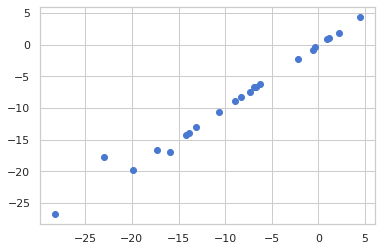

In [732]:
plt.scatter(a,ttest_1samp(zc,0,axis=1)[0])

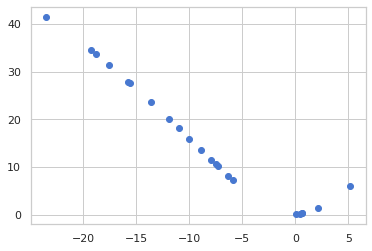

In [693]:
a,b=stats.ttest_rel(zcorrs['CR_bo-CL_bo'], zcorrs['Even_bo-Odd_bo'], axis=1, nan_policy='omit')
plt.scatter(a, -np.log10(b))

In [711]:
bcorrs['CR_bo-CL_bo'].mean(axis=1)

0     0.650878
1     0.577121
2     0.517706
3     0.602668
4     0.688165
5     0.717494
6     0.098759
7     0.582776
8     0.810490
9     0.692569
10    0.385553
11    0.383783
12    0.597292
13    0.610914
14    0.490920
15    0.218564
16    0.370453
17    0.336980
18    0.448984
19    0.183700
20    0.433861
21    0.394015
dtype: float64

(array([3., 2., 2., 2., 1., 3., 3., 1., 3., 2.]),
 array([-0.03582412, -0.028883  , -0.02194188, -0.01500076, -0.00805964,
        -0.00111852,  0.0058226 ,  0.01276372,  0.01970484,  0.02664596,
         0.03358708]),
 <BarContainer object of 10 artists>)

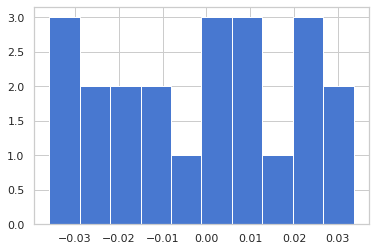

In [716]:
plt.hist(zcorrs['CR_bo-CL_bo'].mean(axis=1)-bcorrs2['CR_bo-CL_bo-corr_z'])

In [654]:
cond = 'CR_bo'
bal_cond_set = ta.bal_cond_sets[cond]
cond_set = {bal_cond_set['cond']: bal_cond_set['sub_conds']}
trials = np.array(list(ta.get_trials_boot_cond_set(cond_set, n_boot=100).values())).squeeze()

In [672]:
with Parallel(n_jobs=5) as parallel:
    print(type(parallel))
    print(isinstance(parallel, Parallel))

<class 'joblib.parallel.Parallel'>
True


In [470]:
%%time 
bcorrs = ta.zone_rate_maps_group_trials_boot_bal_corr()

CPU times: user 10.4 s, sys: 571 ms, total: 11 s
Wall time: 13.4 s


Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 287, in main
    registry[rtype][name] -= 1
KeyError: '/dev/shm/joblib_memmapping_folder_21051_36b23118c28d48af9145605de7a94db2_5991e5e8eca74ba5bbc94405a8b19b52/21051-139781218230528-cf64919ebddd4466aca8fff98d46c4e1.pkl'
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 287, in main
    registry[rtype][name] -= 1
KeyError: '/dev/shm/joblib_memmapping_folder_21051_36b23118c28d48af9145605de7a94db2_5991e5e8eca74ba5bbc94405a8b19b52/21051-139781218230528-7369fcb4b9ea4e329e97137d08855784.pkl'
Traceback (most recent call last):
  File "/home/alexgonzalez/anaconda3/envs/tm_analyses/lib/python3.9/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 287, in main
    registry[rtype][nam

In [477]:
def _transform_corr(_c):
    return rs.fisher_r2z(rs.kendall2pearson(_c))

In [ ]:
c1 = _transform_corr(bcorrs[test])
c2 = _transform_corr(bcorrs[null])

<AxesSubplot:xlabel='0', ylabel='Count'>

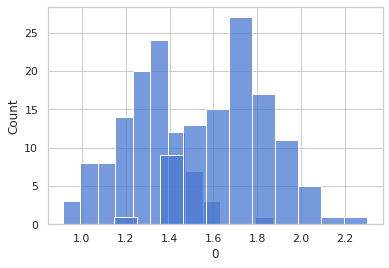

In [522]:
sns.histplot(c1.loc[0])
sns.histplot(c2.loc[0])

## method 1. bootstrap

In [587]:
%%time

tboot = np.zeros(ta.n_units)
pboot = np.zeros(ta.n_units)
for unit in range(ta.n_units):
    tboot[unit], pboot[unit],_ = rs.bootstrap_tdiff(c1.loc[unit],c2.loc[unit])

CPU times: user 2.2 s, sys: 0 ns, total: 2.2 s
Wall time: 2.2 s


In [588]:
pboot

array([0.   , 0.   , 0.   , 0.016, 0.   , 0.016, 0.   , 0.   , 0.   ,
       0.004, 0.   , 0.152, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

## method 2. ttest asuming equal variance

In [590]:
%%time
tev ,pev =stats.ttest_rel(c1,c2, axis=1)
bev

CPU times: user 4.57 ms, sys: 10 µs, total: 4.58 ms
Wall time: 3.25 ms


array([4.22800457e-31, 4.27864144e-27, 8.88555083e-04, 1.04051189e-02,
       9.58699548e-43, 1.53574975e-02, 5.27511978e-06, 2.19310559e-10,
       1.16374603e-08, 2.72010395e-03, 2.80212805e-04, 1.55369492e-01,
       2.08174796e-14, 7.18336082e-03, 1.36930674e-30, 1.46903974e-26,
       2.03549179e-15, 1.63263220e-18, 1.28337080e-30, 4.99859976e-23,
       4.71156162e-12, 1.11122696e-10])

<AxesSubplot:ylabel='Count'>

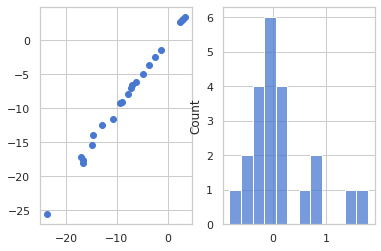

In [600]:
f,ax =plt.subplots(1,2)
ax[0].scatter(tev, tboot)
sns.histplot(tev-tboot, ax=ax[1])

### method 3. convert to correlation difference to z, then get 1samp estimaite

In [601]:
z =  rs.compare_corrs(bcorrs[test], bcorrs[null], 39,39)

In [579]:
tz, tp = stats.ttest_1samp(z,0, nan_policy='omit', axis=1)

<AxesSubplot:ylabel='Count'>

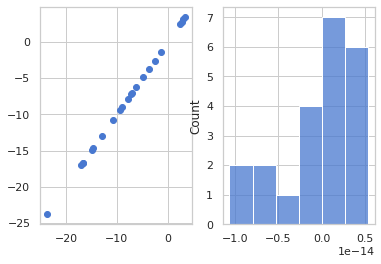

In [622]:
f,ax =plt.subplots(1,2)
ax[0].scatter(tev, tz)
sns.histplot(tev-tz, ax=ax[1])

## method 4. confidence interval overlap

In [607]:
%%time 
test = 'CR-CL'
null = 'Even-Odd'
d = lambda a,b, axis: np.median(a-b, axis=axis)
a = stats.bootstrap((bcorrs[test], bcorrs[null] ), statistic=d, method='basic', n_resamples=1000,  vectorized=True,axis=1, confidence_level=0.99)


CPU times: user 62.7 ms, sys: 7.88 ms, total: 70.5 ms
Wall time: 68.7 ms


In [608]:
np.where(((a.confidence_interval.low<0) & (a.confidence_interval.high>0)))

(array([ 3, 11, 13]),)

In [619]:
np.where(tp>0.001)

(array([ 3,  5,  9, 11, 13]),)

In [621]:
tz[tp>=0.001].mean() , tz[tp<0.001].mean()

(0.8486508157069348, -10.56008256436846)

In [706]:
%%time

n_boot=100
r = np.zeros((ta.n_units,n_boot))
for boot in range(n_boot):
    trials1 = trial_sets['CR'][:,boot]
    trials2 = trial_sets['CL'][:,boot]
    trial_segment_rates_1 = ta.get_trial_segment_rates(trials1)
    trial_segment_rates_2 = ta.get_trial_segment_rates(trials2)
    
    for unit in range(ta.n_units):
        r[unit, boot] = stats.kendalltau(trial_segment_rates_1[unit].mean(), trial_segment_rates_2[unit].mean(), nan_policy='omit', method='asymptotic')[0]

CPU times: user 6.76 s, sys: 7.99 ms, total: 6.77 s
Wall time: 6.76 s


In [853]:
trial_segment_rates_1[0].columns

Index(['H', 'a_0', 'a_1', 'a_2', 'a_3', 'a_4', 'a_5', 'a_6', 'D', 'b_0', 'b_1',
       'b_2', 'b_3', 'b_4', 'b_5', 'i1', 'c_0', 'c_1', 'c_2', 'G1', 'd_0',
       'd_1', 'd_2', 'G2', 'e_0', 'e_1', 'e_2', 'e_3', 'e_4', 'e_5', 'i2',
       'f_0', 'f_1', 'f_2', 'G3', 'g_0', 'g_1', 'g_2', 'G4'],
      dtype='object')

In [716]:
%%time
ta.get_trial_segment_rates(trials1)[0].mean()

CPU times: user 25.9 ms, sys: 37 µs, total: 25.9 ms
Wall time: 23.8 ms


H      11.446623
a_0    30.177785
a_1    21.533306
a_2    12.451606
a_3     5.032137
a_4     2.747232
a_5     2.762894
a_6     2.107529
D       5.582966
b_0     1.422666
b_1     0.872292
b_2     0.772823
b_3     1.202367
b_4     1.203608
b_5     0.347731
i1      2.519870
c_0     0.857638
c_1     1.820177
c_2    11.235265
G1     23.073537
d_0     4.370533
d_1     4.687732
d_2     5.248890
G2      5.332686
e_0     2.941931
e_1     1.330302
e_2     1.118631
e_3     3.284090
e_4     4.059699
e_5     2.931136
i2      2.275314
f_0     2.808103
f_1     5.251919
f_2     7.484452
G3      8.187404
g_0    29.687500
g_1    13.621243
g_2    38.448704
G4     23.212361
dtype: float64

In [717]:
%%time
ta.get_avg_zone_rates(trials1, occupation_samp_thr=0).loc[0]

CPU times: user 176 ms, sys: 0 ns, total: 176 ms
Wall time: 145 ms


H      14.200173
a_0    30.652801
a_1    20.356624
a_2    13.378700
a_3     5.794400
a_4     2.801359
a_5     6.877577
a_6     5.221232
D       9.974592
b_0     1.166667
b_1     1.346199
b_2     0.874638
b_3     1.510656
b_4     1.285676
b_5     0.203698
i1      2.640910
c_0     0.666956
c_1     2.089777
c_2    12.798197
G1     22.101280
d_0     4.408521
d_1     4.779607
d_2     6.114829
G2      6.622765
e_0     4.834859
e_1     1.753731
e_2     1.121549
e_3     4.003415
e_4     6.847439
e_5     3.103660
i2      2.677182
f_0     3.250730
f_1     3.747709
f_2     6.958280
G3      8.577869
g_0    29.687500
g_1    13.621243
g_2    38.448704
G4     23.212361
Name: 0, dtype: float64

## code to get bootrstraped trial sets

In [921]:
%%time 
trial_seg = 'out'
occupation_trial_samp_thr = 1
seg_names = ta.tmz.all_segs_names
n_segs = len(seg_names)

neural_data = ta.get_trial_neural_data()
pzm = ta.trial_zone_samps_counts_mat[trial_seg]

zones_by_trial = ta.trial_zones[trial_seg]
trial_zone_rates = np.zeros(ta.n_units, dtype=object)

dummy_df = pd.DataFrame(np.zeros((ta.n_trials, n_segs)) * np.nan, columns=seg_names)
for unit in range(ta.n_units):
    trial_zone_rates[unit] = dummy_df.copy()

for trial_num in range(ta.n_trials):
    pzm = ta.tmz.get_pos_zone_mat(ta.trial_zones[trial_seg][trial_num])
    pz_counts = pzm.sum()
    pzmn = (pzm / pz_counts).fillna(0)  # pozitions zones normalized by occupancy

    trial_data = np.nan_to_num(np.array(list(neural_data[:, trial_num]), dtype=np.float))
    zone_rates = trial_data @ pzmn
    
    zone_rates.loc[:, pz_counts < occupation_trial_samp_thr] = np.nan
    
    for unit in range(ta.n_units):
        trial_zone_rates[unit].loc[trial_num] = zone_rates.loc[unit]
    

CPU times: user 14.5 s, sys: 308 ms, total: 14.8 s
Wall time: 1.51 s


In [957]:
tzr = trial_zone_rates[0].loc[trials1]
tzr.head()

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
147,11.866197,66.011271,57.618034,20.091186,12.500000,5.416667,3.500000,10.000000,5.044643,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,12.562267,16.672746,10.679123,6.133952,0.190983,2.452254,5.564237,34.833928,9.664853,1.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,8.513986,1.151638,37.236068,11.381966,0.000000,0.000000,0.000000,0.000000,3.465347,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,13.019664,15.625000,16.309017,8.988729,5.416667,0.000000,0.000000,0.000000,5.448718,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,15.256489,57.352458,49.670085,15.758192,34.045085,8.381966,10.515028,3.909153,6.708803,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [959]:
zc.head()

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
147,142.0,4.0,5.0,4.0,4.0,6.0,5.0,5.0,56.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,1149.0,40.0,17.0,19.0,10.0,20.0,46.0,23.0,174.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,143.0,6.0,5.0,5.0,4.0,6.0,5.0,5.0,101.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,104.0,4.0,5.0,4.0,6.0,3.0,6.0,5.0,156.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,84.0,4.0,4.0,3.0,3.0,5.0,3.0,6.0,96.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [943]:
zc = ta.trial_zone_samps_counts_mat['out'].loc[trials1]
zcn = zc/zc.sum()
zcb = tree_maze.subseg_pz_mat_transform(zc,'bigseg') 
zcb

,left,stem,right
147,0.0,231.0,164.0
89,0.0,1498.0,99.0
171,0.0,280.0,70.0
119,0.0,293.0,63.0
31,0.0,208.0,60.0
...,...,...,...
115,62.0,510.0,0.0
95,56.0,561.0,0.0
25,56.0,376.0,0.0
24,58.0,802.0,169.0


In [983]:
(1/(zcb @ tree_maze.subseg2bigseg.T))

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
147,0.004329,0.004329,0.004329,0.004329,0.004329,0.004329,0.004329,0.004329,0.004329,0.006098,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
89,0.000668,0.000668,0.000668,0.000668,0.000668,0.000668,0.000668,0.000668,0.000668,0.010101,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
171,0.003571,0.003571,0.003571,0.003571,0.003571,0.003571,0.003571,0.003571,0.003571,0.014286,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
119,0.003413,0.003413,0.003413,0.003413,0.003413,0.003413,0.003413,0.003413,0.003413,0.015873,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
31,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.004808,0.016667,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,0.001961,inf,...,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129
95,0.001783,0.001783,0.001783,0.001783,0.001783,0.001783,0.001783,0.001783,0.001783,inf,...,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857
25,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660,0.002660,inf,...,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857,0.017857
24,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.001247,0.005917,...,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241


In [996]:
zcb

,left,stem,right
147,0.0,231.0,164.0
89,0.0,1498.0,99.0
171,0.0,280.0,70.0
119,0.0,293.0,63.0
31,0.0,208.0,60.0
...,...,...,...
115,62.0,510.0,0.0
95,56.0,561.0,0.0
25,56.0,376.0,0.0
24,58.0,802.0,169.0


In [1006]:
tzrb = ((tzr * zc/(zcb @ tree_maze.subseg2bigseg.T)).fillna(0) @ tree_maze.subseg2bigseg)
tzrb[zcb<5]=np.nan
tzrbm = (tzrb*(zcb/zcb.sum())).sum()
# tzrb[zcb<5]=np.nan
# tzrb

In [1005]:
zc / (zcb @ tree_maze.subseg2bigseg.T)

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
147,0.614719,0.017316,0.021645,0.017316,0.017316,0.025974,0.021645,0.021645,0.242424,0.030488,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,0.767023,0.026702,0.011348,0.012684,0.006676,0.013351,0.030708,0.015354,0.116155,0.303030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,0.510714,0.021429,0.017857,0.017857,0.014286,0.021429,0.017857,0.017857,0.360714,0.114286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,0.354949,0.013652,0.017065,0.013652,0.020478,0.010239,0.020478,0.017065,0.532423,0.079365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0.403846,0.019231,0.019231,0.014423,0.014423,0.024038,0.014423,0.028846,0.461538,0.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.676471,0.015686,0.013725,0.003922,0.009804,0.009804,0.007843,0.011765,0.250980,NaN,...,0.064516,0.112903,0.112903,0.032258,0.129032,0.274194,0.000000,0.000000,0.000000,0.000000
95,0.655971,0.028520,0.000000,0.001783,0.005348,0.019608,0.001783,0.000000,0.286988,NaN,...,0.071429,0.107143,0.142857,0.017857,0.071429,0.267857,0.000000,0.000000,0.000000,0.000000
25,0.534574,0.069149,0.013298,0.007979,0.005319,0.010638,0.013298,0.010638,0.335106,NaN,...,0.017857,0.089286,0.000000,0.000000,0.000000,0.000000,0.071429,0.089286,0.089286,0.285714
24,0.341646,0.062344,0.053616,0.098504,0.028678,0.013716,0.017456,0.026185,0.357855,0.147929,...,0.068966,0.137931,0.086207,0.068966,0.086207,0.241379,0.000000,0.000000,0.000000,0.000000


In [1007]:
tzrbm

left     10.370441
stem     11.803549
right     8.693486
dtype: float64

In [991]:
ta.get_avg_zone_rates(trials=trials1, segment_type='bigseg')

,left,stem,right
0,10.427033,11.803549,8.693486
1,2.028796,2.033050,0.000000
2,0.785340,3.160260,6.317293
3,12.938518,9.056976,8.388077
4,14.085115,5.503456,5.271663
5,20.079961,5.210880,4.750231
6,1.326880,1.812686,1.446725
7,2.412149,4.122791,2.129113
8,4.555569,21.302745,5.165633
9,3.401464,4.563649,9.694902


In [982]:
(tzr * (1/(zcb @ tree_maze.subseg2bigseg.T))).fillna(0) @ tree_maze.subseg2bigseg 

,left,stem,right
147,0.000000,0.831377,0.453508
89,0.000000,0.065924,1.256841
171,0.000000,0.220532,1.969749
119,0.000000,0.221187,0.448345
31,0.000000,0.969218,0.098039
...,...,...,...
115,0.769927,0.168711,0.000000
95,0.903914,0.036502,0.000000
25,3.078872,0.292987,0.000000
24,1.097312,0.138002,1.683347


In [963]:
((tzr/zc).fillna(0) @ tree_maze.subseg2bigseg)*zcb

,left,stem,right
147,0.000000,9228.599372,986.518449
89,0.000000,4810.844291,2505.465890
171,0.000000,2802.630669,2136.184905
119,0.000000,3070.092127,332.699709
31,0.000000,10283.762142,20.761246
...,...,...,...
115,1049.854629,4201.610290,0.000000
95,1420.905185,286.643031,0.000000
25,2361.612844,4418.222969,0.000000
24,845.743157,2007.089575,4580.358743


In [955]:
tree_maze.subseg_pz_mat_transform( (tzr/zc).fillna(0) , 'bigseg')*

,left,stem,right
147,0.000000,39.950647,6.015356
89,0.000000,3.211512,25.307736
171,0.000000,10.009395,30.516927
119,0.000000,10.478130,5.280948
31,0.000000,49.441164,0.346021
...,...,...,...
115,16.933139,8.238452,0.000000
95,25.373307,0.510950,0.000000
25,42.171658,11.750593,0.000000
24,14.581779,2.502605,27.102714


In [932]:
(trial_zone_rates[0].loc[trials1]*zcn).sum()

H      13.423536
a_0    29.808092
a_1    20.520863
a_2    11.004002
a_3     8.371322
a_4     3.084094
a_5     5.577603
a_6     7.823862
D       8.407772
b_0     6.126889
b_1     2.331326
b_2     3.493078
b_3     3.077229
b_4     3.886384
b_5     5.975737
i1      4.948081
c_0     7.808818
c_1    12.414808
c_2    18.097654
G1     22.764801
d_0     3.819190
d_1     6.119983
d_2     5.783388
G2      5.146585
e_0     5.298550
e_1     1.435250
e_2     0.989863
e_3     3.744574
e_4     6.659361
e_5     2.667947
i2      5.721606
f_0     3.844282
f_1     5.564954
f_2     6.160259
G3     10.303456
g_0    25.912257
g_1    12.168814
g_2    23.431715
G4     24.370762
dtype: float64

## code to get zone rates by pooling samples from a trial set

In [923]:
segment_type = 'subset'
occupation_samp_thr=5
_,samps,_ = ta.get_trial_times(trials1)
neural_data = np.nan_to_num(ta.fr[:, samps])
pz = ta.pz[samps]
pzm = ta.tmz.get_pos_zone_mat(pz, segment_type=segment_type)

pz_counts = pzm.sum()
pzmn = pzm / pz_counts  # pozitions zones normalized by occupancy

In [924]:
zone_rates = neural_data @ pzmn  # matrix multiply
zone_rates.loc[:, pz_counts < occupation_samp_thr] = np.nan

In [926]:
zone_rates.loc[0]

H      13.423536
a_0    29.808092
a_1    20.520863
a_2    11.004002
a_3     8.371322
a_4     3.084094
a_5     5.577603
a_6     7.823862
D       8.407772
b_0     6.126889
b_1     2.331326
b_2     3.493078
b_3     3.077229
b_4     3.886384
b_5     5.975737
i1      4.948081
c_0     7.808818
c_1    12.414808
c_2    18.097654
G1     22.764801
d_0     3.819190
d_1     6.119983
d_2     5.783388
G2      5.146585
e_0     5.298550
e_1     1.435250
e_2     0.989863
e_3     3.744574
e_4     6.659361
e_5     2.667947
i2      5.721606
f_0     3.844282
f_1     5.564954
f_2     6.160259
G3     10.303456
g_0    25.912257
g_1    12.168814
g_2    23.431715
G4     24.370762
Name: 0, dtype: float64

In [920]:
neural_data[0, pzm['H']==1].mean(), (pzm['H']==1).sum(), neural_data[0, pzm['H']==1].sum(), neural_data.shape
#pzm['H']

(13.423535797464671, 23228, 311801.8895035094, (22, 53276))

In [828]:

fr_cnt = 0
samp_cnt = 0 
unit = 0
trial_seg = 'out'
trial_neural_data=ta.get_trial_neural_data(trial_seg=trial_seg)
for trial_num in range():
    pzm = ta.tmz.get_pos_zone_mat(ta.trial_zones[trial_seg][trial_num])
    pz_counts = pzm.sum()
    pzmn = (pzm / pz_counts).fillna(0)  # pozitions zones normalized by occupancy

    trial_data = np.nan_to_num(np.array(list(trial_neural_data[:, trial_num]), dtype=np.float))
    
    zone_rates = trial_data @ pzmn
    
    zone_rates.loc[:, pz_counts < occupation_trial_samp_thr] = np.nan
    
    for unit in range(ta.n_units):
        trial_zone_rates[unit].loc[trial_num] = zone_rates.loc[unit]
    

In [835]:
trial_zone_rates[0].loc[trials1]

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
39,10.179317,40.937500,NaN,11.250000,0.318305,0.000000,0.000000,0.000000,3.061224,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,13.092105,36.250000,7.881966,10.772542,10.000000,0.000000,0.000000,0.000000,5.051020,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,7.671569,3.075819,12.261271,12.261271,0.190983,0.000000,0.000000,0.000000,3.125000,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
41,18.597032,47.818305,28.363729,27.309017,12.500000,0.477458,0.000000,0.000000,7.407407,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,7.671569,3.075819,12.261271,12.261271,0.190983,0.000000,0.000000,0.000000,3.125000,0.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,11.797753,26.845492,19.136271,12.500000,10.809017,0.318305,0.000000,0.000000,7.000000,NaN,...,0.000000,0.000000,0.0,4.375000,12.500000,15.416667,NaN,NaN,NaN,NaN
7,12.007299,21.428571,14.524108,16.397110,8.944727,2.752818,42.553051,20.395981,18.954098,NaN,...,12.690983,6.852203,0.0,0.000000,6.250000,3.065318,29.6875,13.621243,38.448704,23.212361
28,6.455224,48.025763,27.113729,13.223833,0.477458,0.000000,0.000000,0.000000,6.000000,NaN,...,1.984972,4.893898,0.0,0.000000,7.818305,7.269672,NaN,NaN,NaN,NaN
10,11.614169,12.106553,12.696723,1.984972,0.000000,0.000000,0.000000,2.500000,6.588542,NaN,...,0.000000,0.744364,5.0,11.545085,13.272542,7.142857,NaN,NaN,NaN,NaN


In [848]:
tzc = ta.trial_zone_samps_counts_mat['out'].loc[trials1]
tzcn = tzc/tzc.sum()
((trial_zone_rates[0].loc[trials1])*tzcn).sum()
#(trial_zone_rates[0].loc[trials1].fillna(0) @ tzcn)

H      14.200173
a_0    30.652801
a_1    20.356624
a_2    13.378700
a_3     5.794400
a_4     2.801359
a_5     6.877577
a_6     5.221232
D       9.974592
b_0     1.166667
b_1     1.346199
b_2     0.874638
b_3     1.510656
b_4     1.285676
b_5     0.203698
i1      2.640910
c_0     0.666956
c_1     2.089777
c_2    12.798197
G1     22.101280
d_0     4.408521
d_1     4.779607
d_2     6.114829
G2      6.622765
e_0     4.834859
e_1     1.753731
e_2     1.121549
e_3     4.003415
e_4     6.847439
e_5     3.103660
i2      2.677182
f_0     3.250730
f_1     3.747709
f_2     6.958280
G3      8.577869
g_0    29.687500
g_1    13.621243
g_2    38.448704
G4     23.212361
dtype: float64

H      14.200173
a_0    30.652801
a_1    20.356624
a_2    13.378700
a_3     5.794400
a_4     2.801359
a_5     6.877577
a_6     5.221232
D       9.974592
b_0     1.166667
b_1     1.346199
b_2     0.874638
b_3     1.510656
b_4     1.285676
b_5     0.203698
i1      2.640910
c_0     0.666956
c_1     2.089777
c_2    12.798197
G1     22.101280
d_0     4.408521
d_1     4.779607
d_2     6.114829
G2      6.622765
e_0     4.834859
e_1     1.753731
e_2     1.121549
e_3     4.003415
e_4     6.847439
e_5     3.103660
i2      2.677182
f_0     3.250730
f_1     3.747709
f_2     6.958280
G3      8.577869
g_0    29.687500
g_1    13.621243
g_2    38.448704
G4     23.212361
dtype: float64

In [818]:
unit=0
np.hstack(trial_neural_data[unit][trials1]).shape

(48001,)

In [819]:
pz = ta.pz[samps]  # position zones
pzm = ta.tmz.get_pos_zone_mat(pz, segment_type='subseg')  # position zones matrix

In [824]:
np.hstack(trial_neural_data[unit][trials1])[pzm['H']==1].sum()

253018.6803398875

In [808]:
samps

array([39585, 39586, 39587, ..., 10588, 10589, 10590])

In [688]:
trial_num = 7
pzm = ta.tmz.get_pos_zone_mat(ta.trial_zones[trial_seg][trial_num])
pz_counts = pzm.sum()
pzmn = (pzm / pz_counts).fillna(0)  # pozitions zones normalized by occupancy

trial_data = np.nan_to_num(np.array(list(neural_data[:, trial_num]), dtype=np.float))
zone_rates = trial_data @ pzmn

zone_rates.loc[:, pz_counts < occupation_trial_samp_thr] = np.nan

In [695]:
ta.get_avg_zone_rates(trials1).loc[0]

H      14.200173
a_0    30.652801
a_1    20.356624
a_2    13.378700
a_3     5.794400
a_4     2.801359
a_5     6.877577
a_6     5.221232
D       9.974592
b_0     1.166667
b_1     1.346199
b_2     0.874638
b_3     1.510656
b_4     1.285676
b_5     0.203698
i1      2.640910
c_0     0.666956
c_1     2.089777
c_2    12.798197
G1     22.101280
d_0     4.408521
d_1     4.779607
d_2     6.114829
G2      6.622765
e_0     4.834859
e_1     1.753731
e_2     1.121549
e_3     4.003415
e_4     6.847439
e_5     3.103660
i2      2.677182
f_0     3.250730
f_1     3.747709
f_2     6.958280
G3      8.577869
g_0    29.687500
g_1    13.621243
g_2    38.448704
G4     23.212361
Name: 0, dtype: float64

In [699]:
r.mean(axis=1)

array([0.66187327, 0.56922694, 0.60565725, 0.55391044, 0.70599024,
       0.69616353, 0.11780358, 0.51057828, 0.77110779, 0.61926748,
       0.34502931, 0.4202257 , 0.59761064, 0.54237159, 0.43771756,
       0.21536562, 0.34464689, 0.34600326, 0.4188146 , 0.1572156 ,
       0.43689709, 0.33351085])

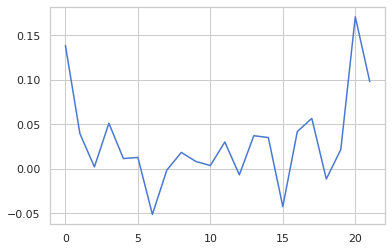

In [709]:
plt.plot(r.mean(axis=1)-bcorrs['CR-CL'].mean(axis=1))

In [506]:
trial_segment_rates_2[0].mean()

H      10.982377
a_0    35.612345
a_1    21.686075
a_2    12.399795
a_3     6.486918
a_4     2.579525
a_5     1.637140
a_6     1.949417
D       5.725554
b_0     0.614115
b_1     0.657015
b_2     0.650832
b_3     1.768021
b_4     2.716932
b_5     3.929780
i1      4.196497
c_0     5.632808
c_1    11.348998
c_2     9.754329
G1     28.135566
d_0     4.140368
d_1     6.630873
d_2     9.884601
G2      4.596200
e_0     1.827946
e_1     1.919792
e_2     2.049990
e_3     1.086143
e_4     0.600512
e_5     2.965978
i2      6.683018
f_0     1.072740
f_1     8.351644
f_2    15.287672
G3     12.954420
g_0          NaN
g_1    45.641302
g_2    52.702023
G4     53.150385
dtype: float64

In [489]:
rs.kendall(trial_segment_rates_1[unit], trial_segment_rates_2[unit])

ValueError: All inputs to `kendalltau` must be of the same size, found x-size 3666 and y-size 3432

In [490]:
?stats.kendalltau

Signature:
stats.kendalltau(
    x,
    y,
    initial_lexsort=None,
    nan_policy='propagate',
    method='auto',
    variant='b',
)
Docstring:
Calculate Kendall's tau, a correlation measure for ordinal data.

Kendall's tau is a measure of the correspondence between two rankings.
Values close to 1 indicate strong agreement, and values close to -1
indicate strong disagreement. This implements two variants of Kendall's
tau: tau-b (the default) and tau-c (also known as Stuart's tau-c). These
differ only in how they are normalized to lie within the range -1 to 1;
the hypothesis tests (their p-values) are identical. Kendall's original
tau-a is not implemented separately because both tau-b and tau-c reduce
to tau-a in the absence of ties.

Parameters
----------
x, y : array_like
    Arrays of rankings, of the same shape. If arrays are not 1-D, they
    will be flattened to 1-D.
initial_lexsort : bool, optional
    Unused (deprecated).
nan_policy : {'propagate', 'raise', 'omit'}, optional
 

In [195]:
%%time
b100 = ta.all_zone_rate_comp_analyses(n_boot=100)

CPU times: user 2min 8s, sys: 1.34 s, total: 2min 9s
Wall time: 2min 3s


In [196]:
%%time
b50 = ta.all_zone_rate_comp_analyses(n_boot=50)

CPU times: user 1min 13s, sys: 919 ms, total: 1min 14s
Wall time: 58.2 s


In [199]:
(b50-b100).mean()

CR-CL_corr                           0.000000
CR-CL_t_m                            0.000000
CR-CL_t_var                          0.000000
Even-Odd_corr                        0.000000
Even-Odd_t_m                         0.000000
Even-Odd_t_var                       0.000000
Co-Inco_corr                         0.000000
Co-Inco_t_m                          0.000000
Co-Inco_t_var                        0.000000
Out-In_corr                          0.000000
Out-In_t_m                           0.000000
Out-In_t_var                         0.000000
Left_corr                            0.000000
Left_t_m                             0.000000
Left_t_var                           0.000000
Right_corr                           0.000000
Right_t_m                            0.000000
Right_t_var                          0.000000
CoSw-IncoSw_corr                     0.000000
CoSw-IncoSw_t_m                      0.000000
CoSw-IncoSw_t_var                    0.000000
CR-CL_boot_corr_m                 

In [201]:
b50['CR-CL_Even-Odd_boot_corr_zz']

0    -2.061432
1    -1.435295
2     0.070119
3    -0.206396
4    -2.539072
5    -0.199565
6    -0.507688
7    -0.792960
8    -0.634379
9    -0.345068
10   -0.957637
11   -0.494928
12   -0.928862
13   -0.821532
14   -1.965969
15   -0.796050
16   -1.752373
17   -1.580543
18   -1.865067
19   -1.385036
20   -1.421895
21   -0.610003
Name: CR-CL_Even-Odd_boot_corr_zz, dtype: float64

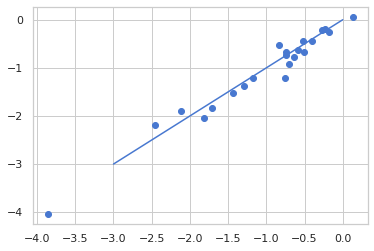

In [205]:
plt.scatter(b100['CR-CL_Even-Odd_boot_corr_zm'], b50['CR-CL_Even-Odd_boot_corr_zm'])
plt.plot([-3,0], [-3,0])

In [165]:
%%time
ta.get_avg_zone_rates()

CPU times: user 124 ms, sys: 28.5 ms, total: 152 ms
Wall time: 96 ms


,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
0,13.592591,27.496360,18.252434,10.974610,5.979455,3.396532,4.620998,5.061592,6.884362,2.430969,...,6.631833,10.550764,3.015325,9.798151,14.998610,12.835373,24.885549,37.726285,45.269189,41.734825
1,2.716751,11.190858,6.885127,3.769006,0.320317,0.002809,0.035492,0.000000,0.304720,0.000000,...,2.643522,1.709917,0.000000,2.381182,2.973305,0.014510,0.035367,8.513234,12.170906,11.781534
2,3.752154,3.660525,1.709346,1.915386,1.149035,1.249779,2.600870,1.253426,0.610316,0.891089,...,0.178747,0.735050,0.189546,0.659758,0.392000,0.224302,4.422586,1.939768,0.198758,0.105931
3,9.911423,17.485359,19.523375,15.438368,13.189907,10.491405,10.769095,10.193658,5.863837,6.077763,...,15.745691,12.101998,10.402893,9.032908,10.689082,8.419513,15.582574,15.625806,17.055884,16.506690
4,5.282143,16.067149,20.380445,17.701231,11.517914,7.300808,3.220017,1.109139,1.835638,0.248247,...,21.580531,16.427347,6.611782,7.076338,9.903193,3.674720,4.515179,3.420088,2.551096,5.319952
5,4.210208,4.361101,5.423176,6.495654,6.885828,8.244331,7.691019,8.170656,6.631954,6.516020,...,18.978823,20.044091,18.429735,18.112947,15.325974,16.173886,18.967972,17.036733,18.941156,25.144346
6,2.048821,1.655885,1.043871,1.506334,0.897901,0.762612,1.504517,0.993256,0.811383,0.938703,...,1.210756,1.314271,0.533867,1.458956,1.476000,1.717239,0.648148,1.920203,0.914547,1.271994
7,6.068840,6.022742,4.115608,2.573302,1.575624,1.099554,0.591233,0.503157,0.625096,0.161475,...,4.750633,1.849342,0.239121,0.428754,1.664223,0.889661,0.683515,1.920203,2.054642,1.590133
8,15.689445,34.407712,38.504249,40.998073,42.270745,45.099586,45.293013,46.967617,26.778736,30.191349,...,5.531996,2.751258,0.796940,1.352701,1.548584,1.413162,3.602762,6.111163,3.461148,1.078219
9,3.467033,4.388889,4.756557,5.215579,5.846325,6.157052,7.645988,7.121838,5.953224,12.626822,...,3.593696,3.632898,3.201133,3.001349,3.241305,3.056241,2.292957,3.492539,4.261622,2.372488


In [166]:
%%time
ta.zone_rate_trial_quantification(cond='CL')

/home/alexgonzalez/anaconda3/envs/spk_phy2/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


CPU times: user 326 ms, sys: 40 µs, total: 326 ms
Wall time: 322 ms


,si,all_m,all_s,all_n,all_z,left_m,left_s,left_n,left_z,right_m,...,G2_n,G2_z,G3_m,G3_s,G3_n,G3_z,G4_m,G4_s,G4_n,G4_z
0,1.440741,10.097392,6.828087,89,1.478803,4.192755,1.831588,50,2.289137,1.479294,...,25,1.425126,12.669321,4.364883,48,2.902557,52.863201,5.410764,33,9.770007
1,2.119546,2.387830,2.937610,89,0.812848,0.853842,0.743572,50,1.148298,0.000000,...,25,NaN,0.011648,0.050111,48,0.232442,13.799024,4.830455,33,2.856672
2,3.075630,1.442309,2.046165,89,0.704884,0.117377,0.437266,50,0.268433,1.008920,...,25,0.501665,0.197167,0.486543,48,0.405241,0.031760,0.171035,33,0.185695
3,0.461091,10.377300,9.910747,89,1.047075,3.509396,3.449749,50,1.017290,1.719884,...,25,0.971896,8.080902,7.191218,48,1.123718,14.328410,9.948909,33,1.440199
4,0.770810,10.256238,9.509624,89,1.078511,5.331958,3.647412,50,1.461847,0.612962,...,25,2.135285,2.906057,3.662181,48,0.793532,1.580033,2.787716,33,0.566784
5,0.362429,10.007121,6.664251,89,1.501612,5.839923,3.137979,50,1.861046,1.320519,...,25,1.222244,15.262872,4.351221,48,3.507722,24.564400,6.354411,33,3.865724
6,1.074688,1.039155,2.300851,89,0.451639,0.346148,0.777984,50,0.444930,0.394002,...,25,0.868522,1.400122,1.591413,48,0.879798,1.125251,1.976006,33,0.569457
7,0.910702,1.920549,3.081018,89,0.623349,0.950570,1.422707,50,0.668142,0.360028,...,25,0.806898,0.757021,1.102885,48,0.686401,0.874167,1.106775,33,0.789832
8,0.499136,18.917542,7.814251,89,2.420903,1.640798,1.723544,50,0.951991,1.795847,...,25,0.903535,1.115149,1.422928,48,0.783700,0.696163,1.360960,33,0.511523
9,0.578905,6.199033,5.640992,89,1.098926,1.167844,1.588657,50,0.735114,2.818392,...,25,1.947027,3.201905,2.456946,48,1.303205,1.839945,1.781364,33,1.032886


In [180]:
%%time
group_cond_sets = {'CR-CL': {'CR': ['Co', 'Inco'], 'CL': ['Co', 'Inco']},
                   'Co-Inco': {'Co':['CL', 'CR'], 'Inco': ['CR', 'CL']},
                   'CoSw-IncoSw': {'CoSw': ['CL', 'CR'], 'IncoSw':['CL', 'CR']},
                   'Rw': {'CL':['Co', 'Inco'], 'CR':['Co', 'Inco']},
                   'Even-Odd': {'Even': ['CL', 'CR'], 'Odd': ['CL', 'CR']},
                   'Even-Odd-In': {'Even': ['CL', 'CR'], 'Odd': ['CL', 'CR']}}

group_trial_segs = {'CR-CL': ['out','out'],
                   'Co-Inco': ['out','out'],
                   'CoSw-IncoSw': ['out','out'],
                   'Rw': ['in','in'],
                   'Even-Odd': ['out','out'],
                   'Even-Odd-In': ['in', 'in']}

bcorrs = ta.zone_rate_maps_group_trials_boot_bal_corr(group_cond_sets=group_cond_sets, group_trial_segs=group_trial_segs)
            

CPU times: user 1min 45s, sys: 1.11 s, total: 1min 46s
Wall time: 1min 58s


In [181]:
bcorrs

{'CR-CL':           0         1         2         3         4         5         6   \
 0   0.595142  0.527665  0.516358  0.473684  0.510669  0.334282  0.587045   
 1   0.587813  0.542782  0.687202  0.432823  0.523573  0.576145  0.567122   
 2   0.536523  0.511109  0.514535  0.492822  0.492485  0.455479  0.548851   
 3   0.543860  0.506073  0.570413  0.600540  0.590327  0.411095  0.438596   
 4   0.668488  0.663031  0.687773  0.731244  0.693357  0.684861  0.658503   
 5   0.638327  0.697706  0.755334  0.724696  0.724040  0.724040  0.662618   
 6   0.136302  0.101215  0.086771  0.152497  0.297297  0.126600  0.051386   
 7   0.637407  0.576248  0.552069  0.600540  0.618777  0.549466  0.569885   
 8   0.802969  0.773279  0.866287  0.738192  0.823613  0.803698  0.778677   
 9   0.686910  0.689609  0.786629  0.676113  0.718350  0.729730  0.651822   
 10  0.314440  0.430499  0.408250  0.333333  0.305832  0.300142  0.333333   
 11  0.341430  0.468286  0.527738  0.314440  0.339972  0.283073  0.

In [153]:
a = ta.get_trials_boot_cond_set({'CR':['Co', 'Inco'], 'CL':['Co', 'Inco']})

In [161]:
a['CL'].shape

(88, 100)

In [146]:
%%time
ta.zone_rate_maps_corr(cond1='CL', cond2='CR', corr_method='kendall')

CPU times: user 1.76 s, sys: 40.4 ms, total: 1.8 s
Wall time: 314 ms


0     0.543860
1     0.476390
2     0.534964
3     0.643725
4     0.691108
5     0.751687
6     0.176788
7     0.654521
8     0.838057
9     0.727395
10    0.449393
11    0.484480
12    0.684211
13    0.678812
14    0.543860
15    0.325236
16    0.408907
17    0.360324
18    0.519568
19    0.249663
20    0.384615
21    0.398111
dtype: float64

In [88]:
samps = ta.outbound_samps
samps

array([   101,    102,    103, ..., 161892, 161893, 161894])

In [109]:
neural_data = ta.fr[:, samps]
pz = ta.pz[samps]  # position zones
pzm = ta.tmz.get_pos_zone_mat(pz, subsegs=True)  # position zones matrix
pz_counts = pzm.sum()
pzmn = pzm / pz_counts   # pozitions zones normalized by occupancy

In [106]:
pzm.sum().sum(), len(pz)

(87293, 89570)

In [113]:
neural_data[np.isnan(neural_data)] = 0
neural_data@pzmn

,H,a_0,a_1,a_2,a_3,a_4,a_5,a_6,D,b_0,...,e_5,i2,f_0,f_1,f_2,G3,g_0,g_1,g_2,G4
0,13.592591,27.496360,18.252434,10.974610,5.979455,3.396532,4.620998,5.061592,6.884362,2.430969,...,6.631833,10.550764,3.015325,9.798151,14.998610,12.835373,24.885549,37.726285,45.269189,41.734825
1,2.716751,11.190858,6.885127,3.769006,0.320317,0.002809,0.035492,0.000000,0.304720,0.000000,...,2.643522,1.709917,0.000000,2.381182,2.973305,0.014510,0.035367,8.513234,12.170906,11.781534
2,3.752154,3.660525,1.709346,1.915386,1.149035,1.249779,2.600870,1.253426,0.610316,0.891089,...,0.178747,0.735050,0.189546,0.659758,0.392000,0.224302,4.422586,1.939768,0.198758,0.105931
3,9.911423,17.485359,19.523375,15.438368,13.189907,10.491405,10.769095,10.193658,5.863837,6.077763,...,15.745691,12.101998,10.402893,9.032908,10.689082,8.419513,15.582574,15.625806,17.055884,16.506690
4,5.282143,16.067149,20.380445,17.701231,11.517914,7.300808,3.220017,1.109139,1.835638,0.248247,...,21.580531,16.427347,6.611782,7.076338,9.903193,3.674720,4.515179,3.420088,2.551096,5.319952
5,4.210208,4.361101,5.423176,6.495654,6.885828,8.244331,7.691019,8.170656,6.631954,6.516020,...,18.978823,20.044091,18.429735,18.112947,15.325974,16.173886,18.967972,17.036733,18.941156,25.144346
6,2.048821,1.655885,1.043871,1.506334,0.897901,0.762612,1.504517,0.993256,0.811383,0.938703,...,1.210756,1.314271,0.533867,1.458956,1.476000,1.717239,0.648148,1.920203,0.914547,1.271994
7,6.068840,6.022742,4.115608,2.573302,1.575624,1.099554,0.591233,0.503157,0.625096,0.161475,...,4.750633,1.849342,0.239121,0.428754,1.664223,0.889661,0.683515,1.920203,2.054642,1.590133
8,15.689445,34.407712,38.504249,40.998073,42.270745,45.099586,45.293013,46.967617,26.778736,30.191349,...,5.531996,2.751258,0.796940,1.352701,1.548584,1.413162,3.602762,6.111163,3.461148,1.078219
9,3.467033,4.388889,4.756557,5.215579,5.846325,6.157052,7.645988,7.121838,5.953224,12.626822,...,3.593696,3.632898,3.201133,3.001349,3.241305,3.056241,2.292957,3.492539,4.261622,2.372488


In [ ]:
pz

In [45]:
def plot_trial_track_spikes(trial_analyses, unit=0, ax=None):
    
    lw = 0.1 # line width
    la = 0.3 # line alpha
    lc = '0.5' # line color
    
    ss = 2 # scatter scale
    sc = 'r' # scatter color 
    sa = 0.3 # scatter alpha
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
        
    x,y = trial_analyses.get_trial_track_pos()
    spk = trial_analyses.get_trial_neural_data(data_type='spikes')
    
    for tr in range(trial_analyses.n_trials):
        samps = tree_maze.get_inmaze_samps(x[tr],y[tr])
        
        ax.plot(x[tr][samps], y[tr][samps], linewidth=lw, alpha=la, color=lc)
        ax.scatter(x[tr][samps], y[tr][samps], s=spk[unit,tr][samps]*ss, color=sc, alpha=sa, linewidth=0)

    ax.axis("square")
    ax.axis("off")
    ax.set_ylim(trial_analyses.y_edges[0], trial_analyses.y_edges[-1])
    ax.set_xlim(trial_analyses.x_edges[0], trial_analyses.x_edges[-1])
    
    return ax

def plot_trial_rate_map(trial_analyses, unit=0, ax=None):
    cmap = 'viridis'
    
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure    
    
    fr_maps_trials = trial_analyses.get_trial_rate_maps()
    
    ax = sns.heatmap(fr_maps_trials[unit], cbar=False, square=True, cmap=cmap, ax=ax)
    ax.invert_yaxis()
    ax.axis("off")
    
    data = fr_maps_trials[unit].flatten()
    data_colors, color_array = pf.get_colors_from_data(data, cmap=cmap)
    
    ax_p = ax.get_position()
    w, h = ax_p.width, ax_p.height
    x0,y0 = ax_p.x0, ax_p.y0

    cax_p = [x0+w*1.02, y0+h*0.05, w*0.05, h*0.15]
    cax = f.add_axes(cax_p)

    pf.get_color_bar_axis(cax, color_array, color_map=cmap, label='FR')

    return ax

def plot_zone_rates(zone_rates, ax=None, min_value=0, max_value=None, label='FR', color_map='YlOrRd', div=False):
    if ax is None:
        f,ax = plt.subplots()
    else:
        f = ax.figure
    
    tree_maze.plot_zone_activity(zone_rates,  ax=ax, min_value=min_value, max_value=max_value, color_map=color_map, label=label)


In [46]:
@interact(unit=widgets.IntSlider(value=0, max=ta.n_units))
def plot_maps(unit):
    f,ax = plt.subplots(1,3,figsize=(6,2),dpi=400)
    plot_trial_track_spikes(ta, unit=unit, ax=ax[0])
    plot_trial_rate_map(ta,unit=unit, ax=ax[1])
    zone_rates = ta.get_avg_zone_rates() 
    plot_zone_rates(zone_rates.loc[unit], ax=ax[2])

interactive(children=(IntSlider(value=0, description='unit', max=22), Output()), _dom_classes=('widget-interac…

In [9]:
a,b=session_info.get_pos_zones(return_invalid_pz=True)

In [13]:
vts = tree_maze.check_valid_pos_zones_transitions(a)

In [16]:
(~vts).sum()

130

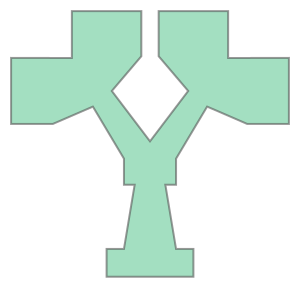

In [37]:
tree_maze.maze_union

In [47]:
track_data,nan_idx = session_info.get_track_data(return_nan_idx=True)

,t,x,y,ha
0,489.949,190.368533,860.551084,2.234021
1,489.969,176.504035,838.124600,1.815142
2,489.989,171.462017,837.906691,1.815142
3,490.009,162.134914,824.407219,1.431170
4,490.029,131.380287,788.154401,1.692969
...,...,...,...,...
161890,3727.749,248.644008,29.267635,5.899213
161891,3727.769,248.644008,29.267635,5.899213
161892,3727.789,248.644008,29.267635,5.899213
161893,3727.809,248.644008,29.267635,5.899213


In [51]:
samps = tree_maze.get_inmaze_samps(track_data.x,track_data.y)

In [54]:
nan_idx

array([    44,     48,    132, ..., 194050, 194051, 194052])

In [72]:
pz, samps2 = tree_maze.get_pos_zone_ts(track_data.x, track_data.y)

In [73]:
samps

array([ True,  True,  True, ...,  True,  True,  True])

In [76]:
samps[samps2].sum()

0